<a href="https://www.kaggle.com/code/surajankola/ml-survey?scriptVersionId=207234661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 

In [3]:
data = pd.read_csv('/kaggle/input/2020-kaggle-machine-learning-and-data-science-survey/kaggle_survey_2020_responses.csv/kaggle_survey_2020_responses.csv')
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

# Showing the top 10 contents in the file using  head attribute

In [4]:
data.head(10)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,401,30-34,Man,India,Bachelor’s degree,Data Analyst,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,748,22-24,Man,Brazil,Bachelor’s degree,Student,3-5 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,171196,25-29,Woman,China,Master’s degree,Student,< 1 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,150,22-24,Man,China,No formal education past high school,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Age Distribution

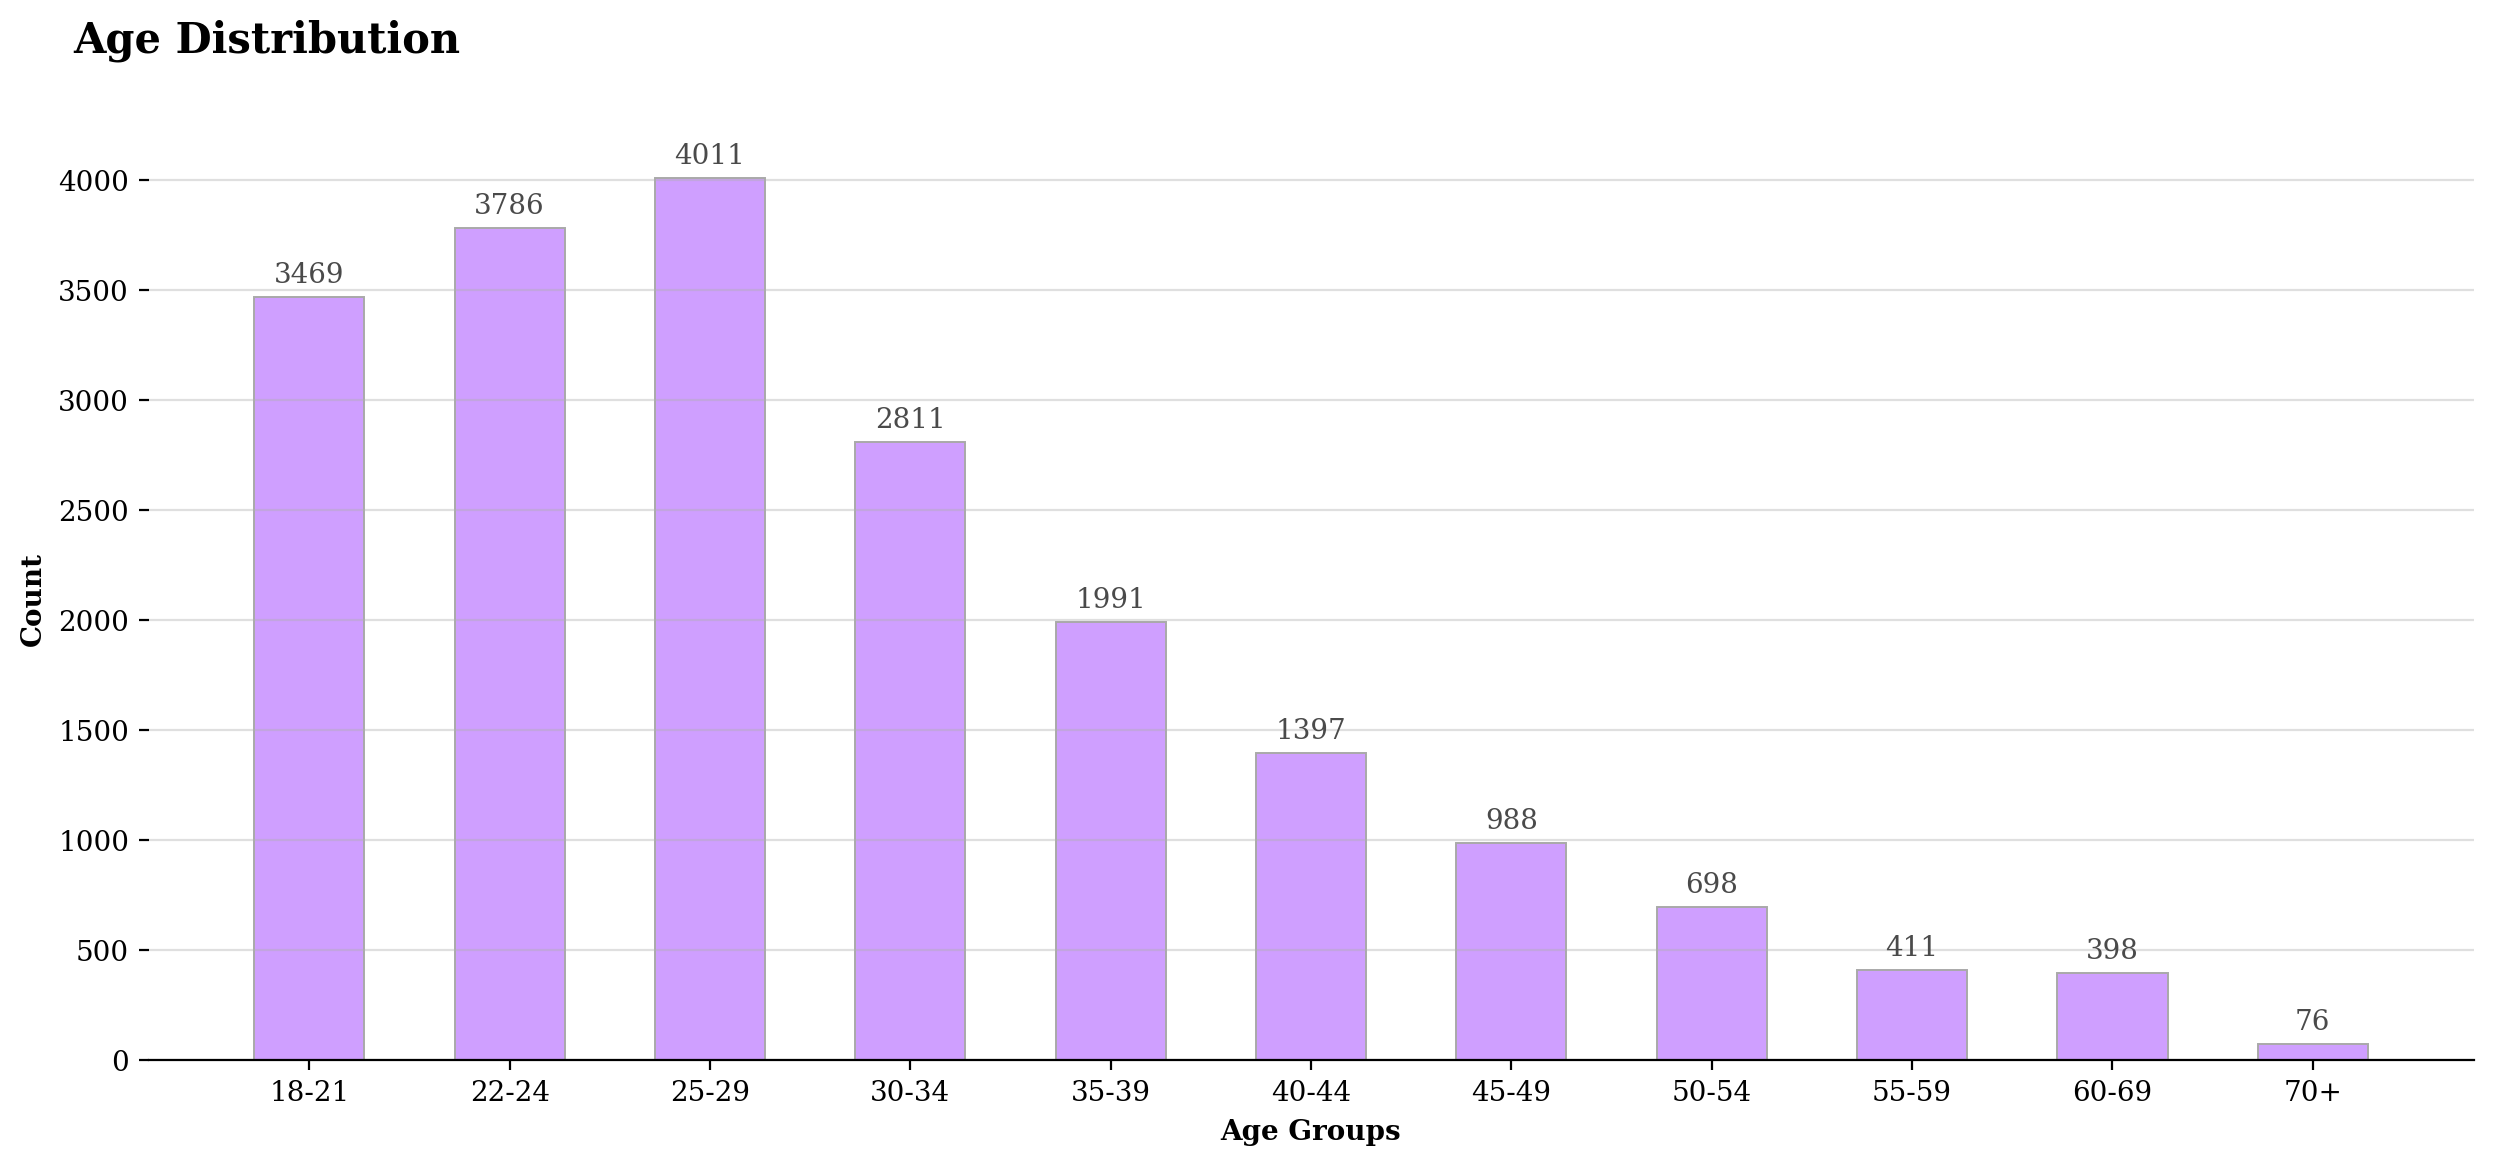

In [5]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, 
       edgecolor='darkgray', color='#CF9FFF',
       linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

ax.set_xlabel("Age Groups", fontweight='bold', fontfamily='serif')
ax.set_ylabel("Count", fontweight='bold', fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)    
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500),fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

# Age Gender Distribution

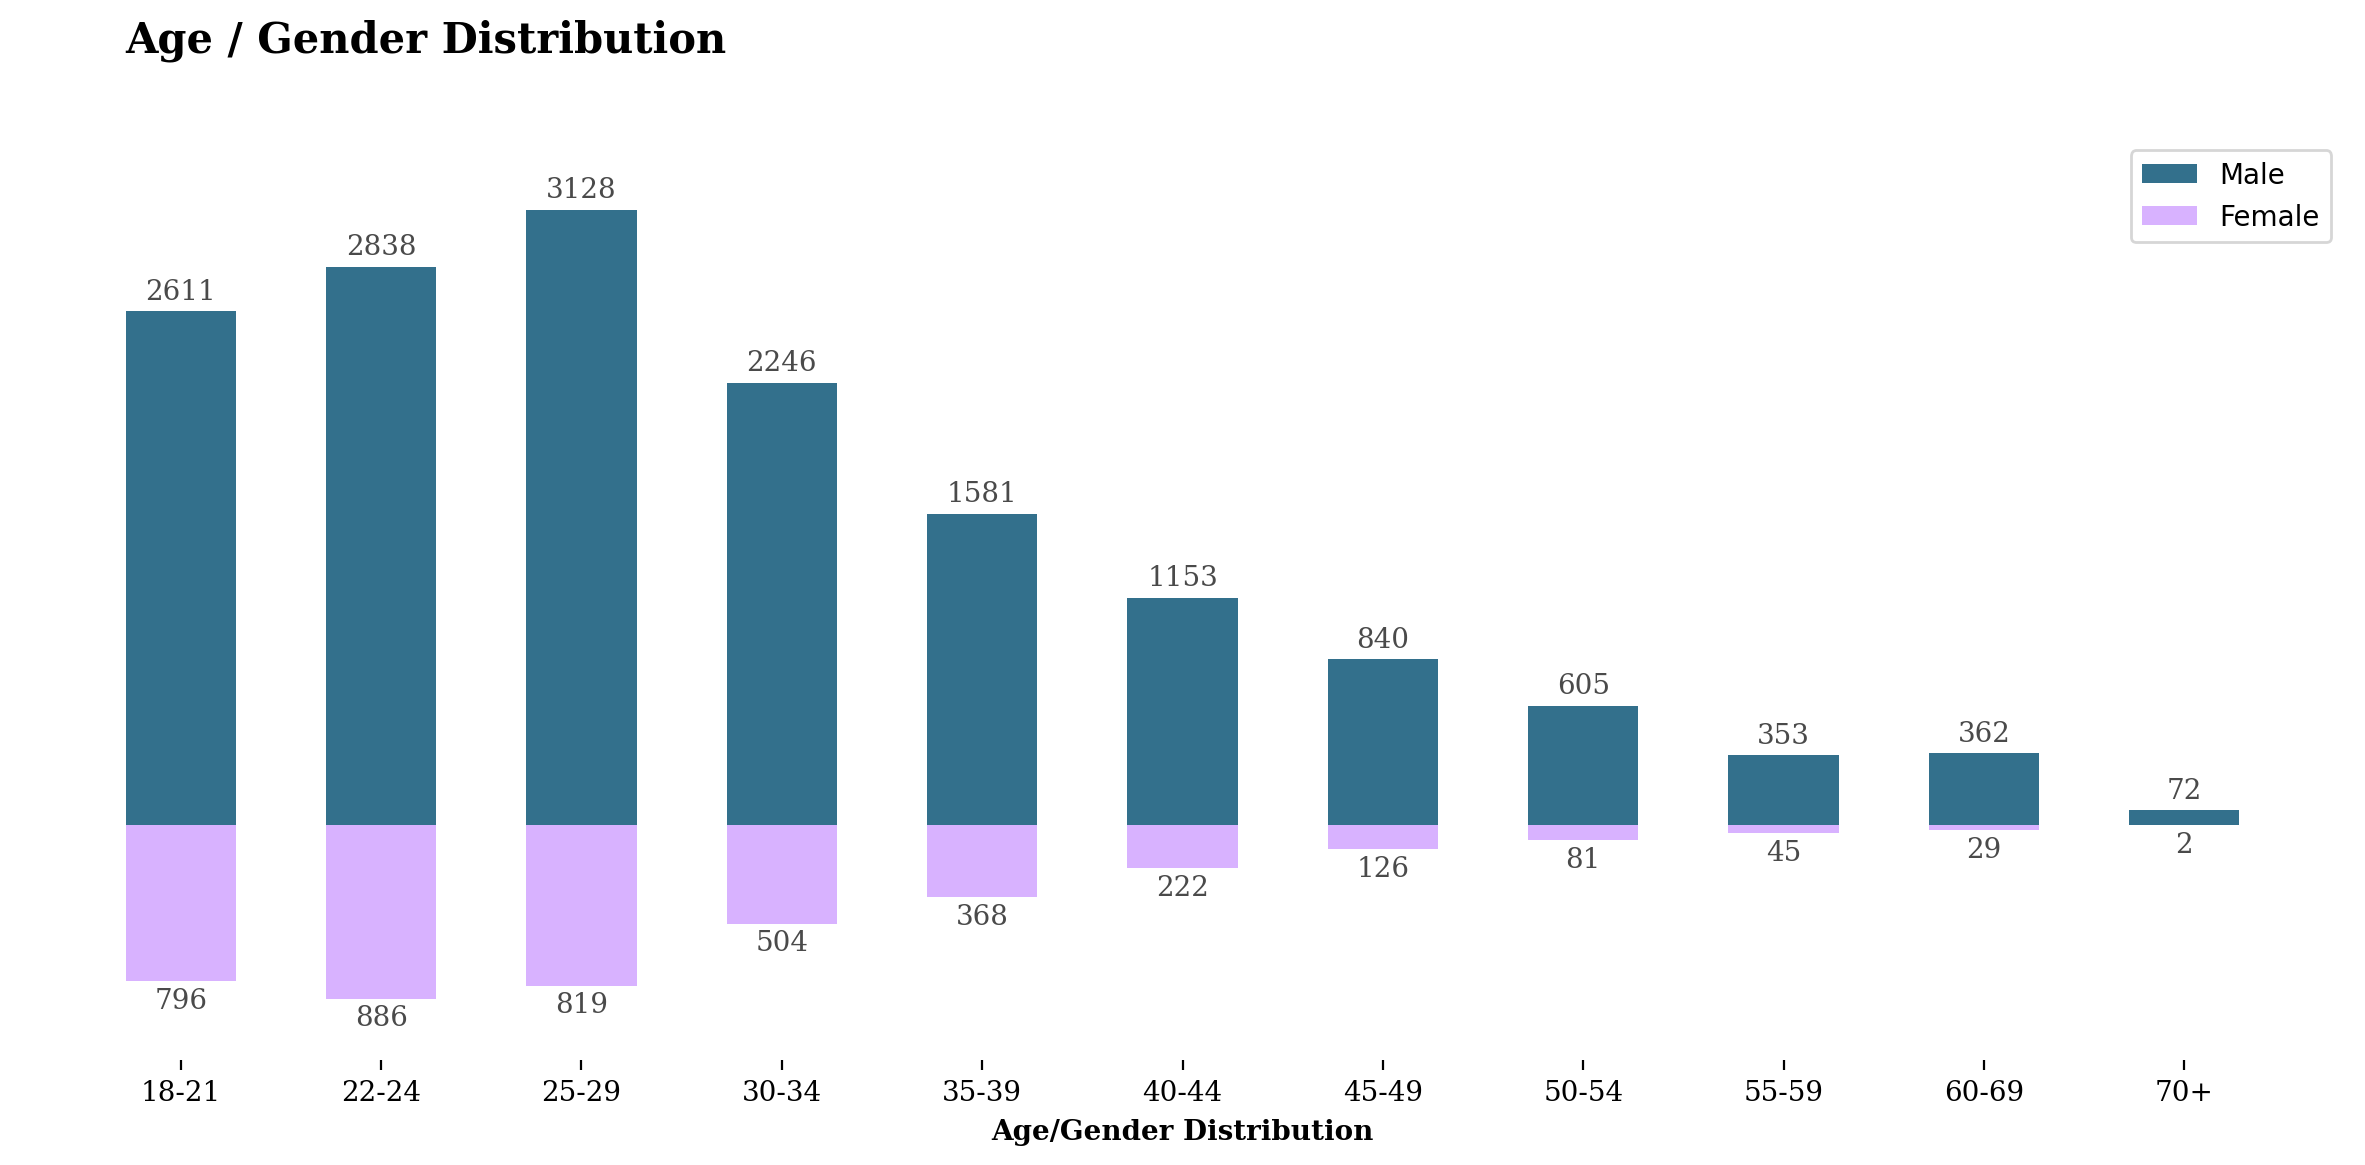

In [6]:
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#CF9FFF', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

ax.set_xlabel("Age/Gender Distribution", fontweight='bold', fontfamily='serif')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

# Gender Percentage w.r.t countries



In [7]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]

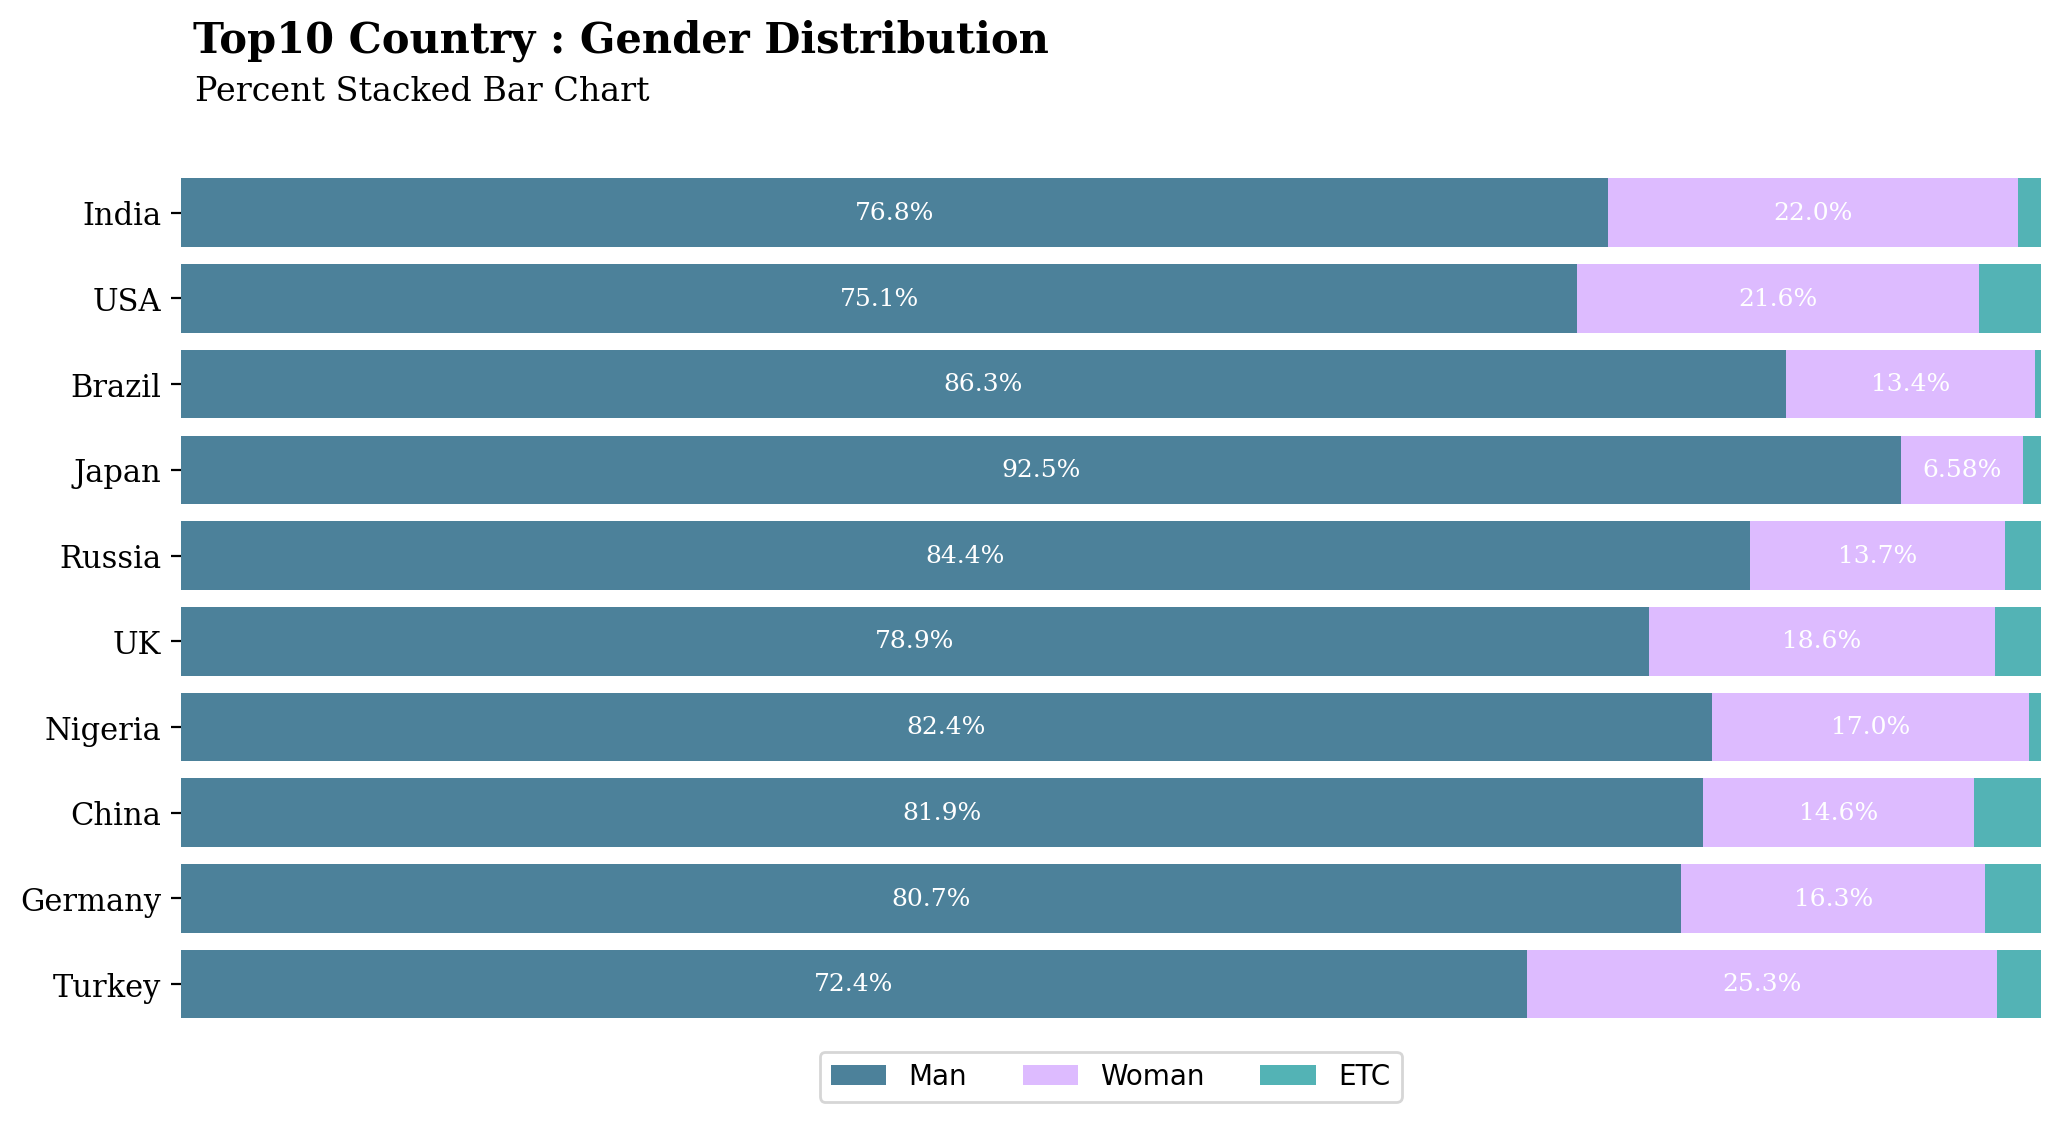

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], 
        color='#004c70', alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], 
        color='#CF9FFF', alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], 
        color='#0A9396', alpha=0.7, label='ETC')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

# Count of people according to their experience 

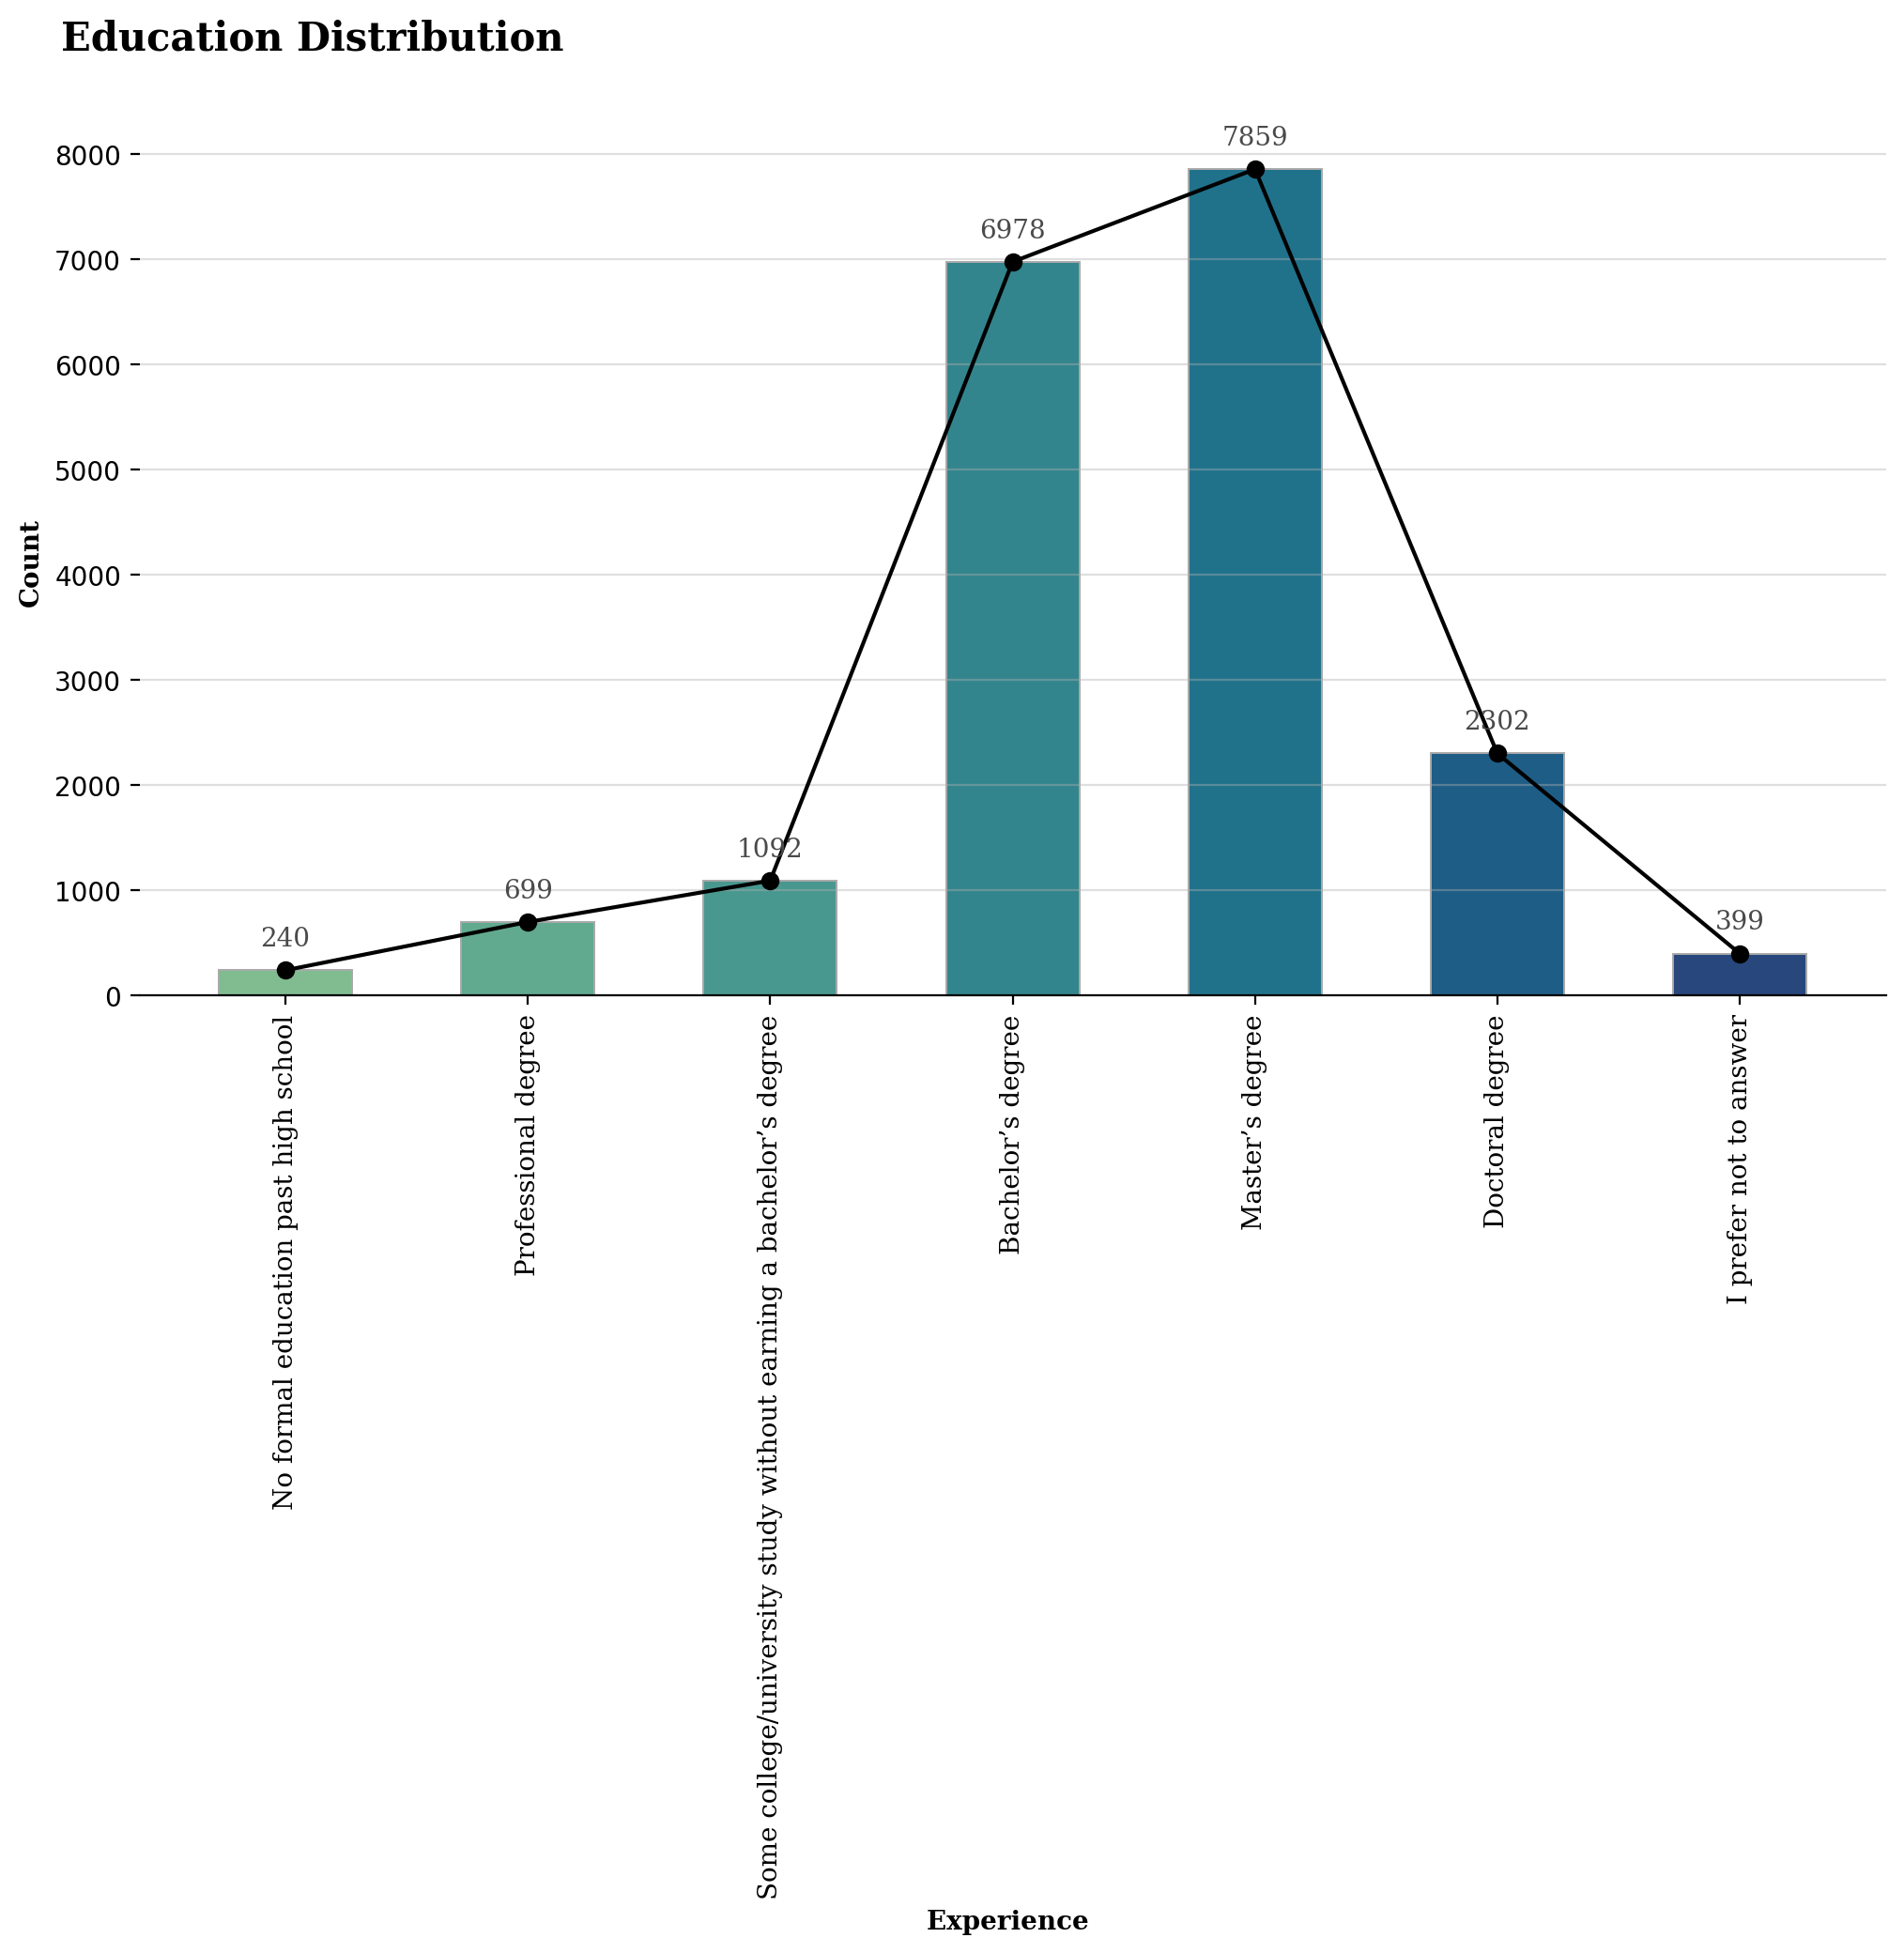

In [9]:
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer'
]

data_q4 = data['Q4'].value_counts()[q4_order]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color=sns.color_palette("crest", 7),
       linewidth=0.7)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", 
                   xy=(i, data_q4[i] + 300),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
ax.set_ylabel("Count", fontweight='bold', fontfamily='serif')

ax.set_xlabel("Experience ", fontweight='bold', fontfamily='serif')
ax.plot(data_q4.index, data_q4, color='black', marker='o', linestyle='-', linewidth=1.5, label="Trend Line")


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, 'Education Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

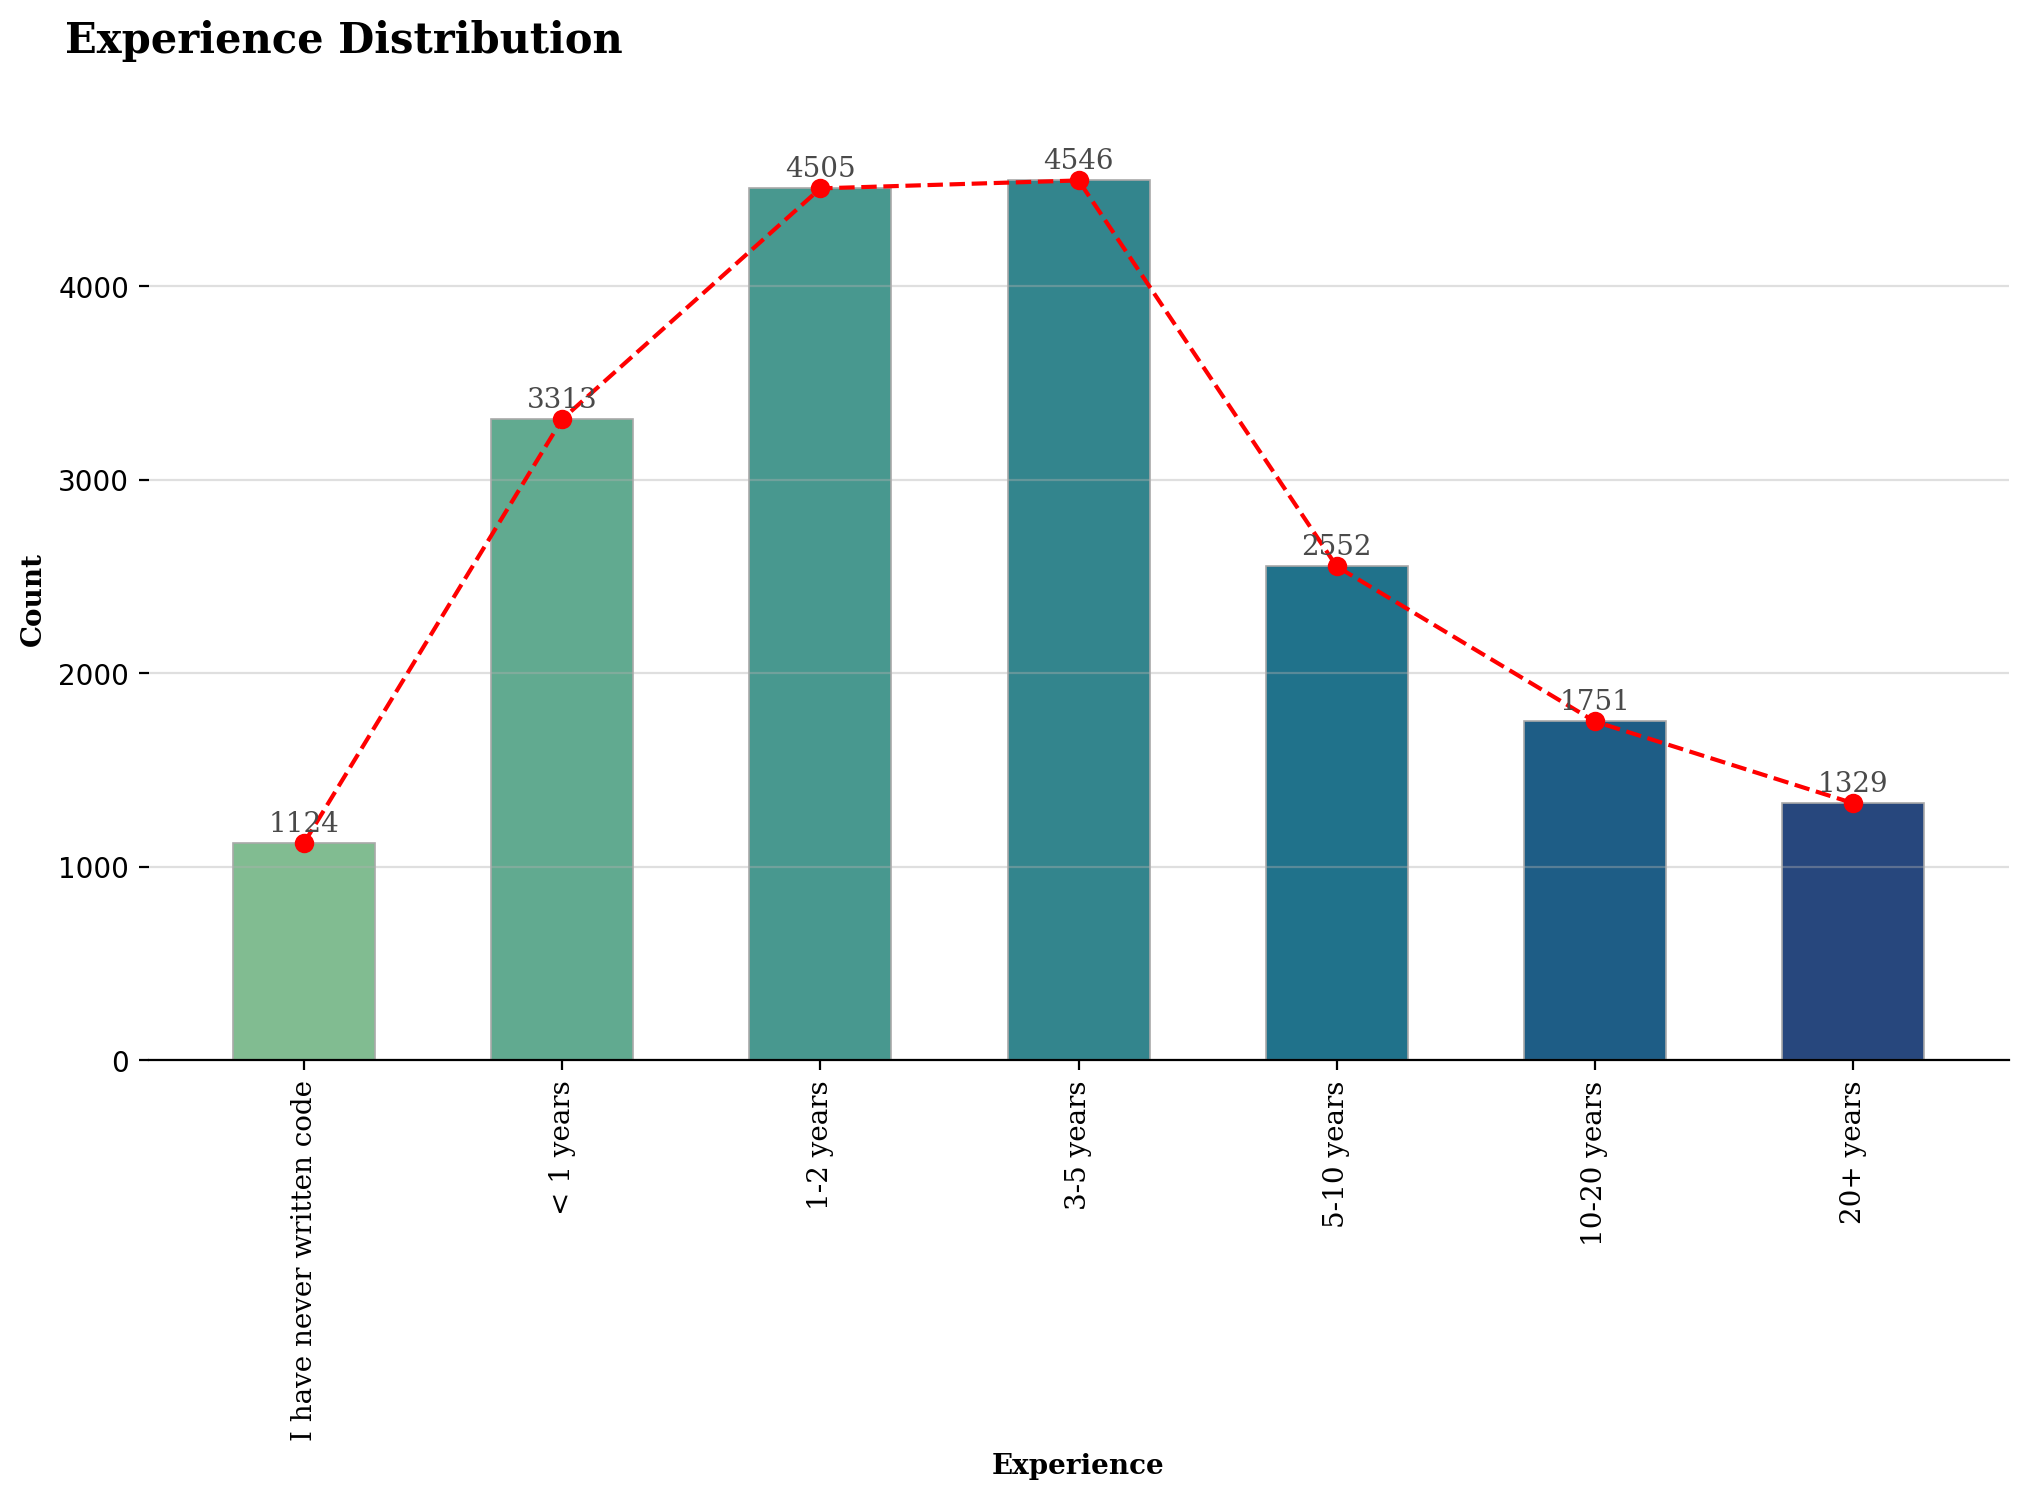

In [10]:
q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years',
]

data_q6 = data['Q6'].value_counts()[q6_order]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q6.index, data_q6, width=0.55, 
       edgecolor='darkgray', color=sns.color_palette("crest", 7),
       linewidth=0.6)

for i in data_q6.index:
    ax.annotate(f"{data_q6[i]}", 
                   xy=(i, data_q6[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
ax.set_xlabel("Experience", fontweight='bold', fontfamily='serif')
ax.set_ylabel("Count", fontweight='bold', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q6.index, fontfamily='serif', rotation=90)
ax.plot(data_q6.index, data_q6, color='red', marker='o', linestyle='--', linewidth=1.5, label="Trend Line")

fig.text(0.09, 0.95, 'Experience Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

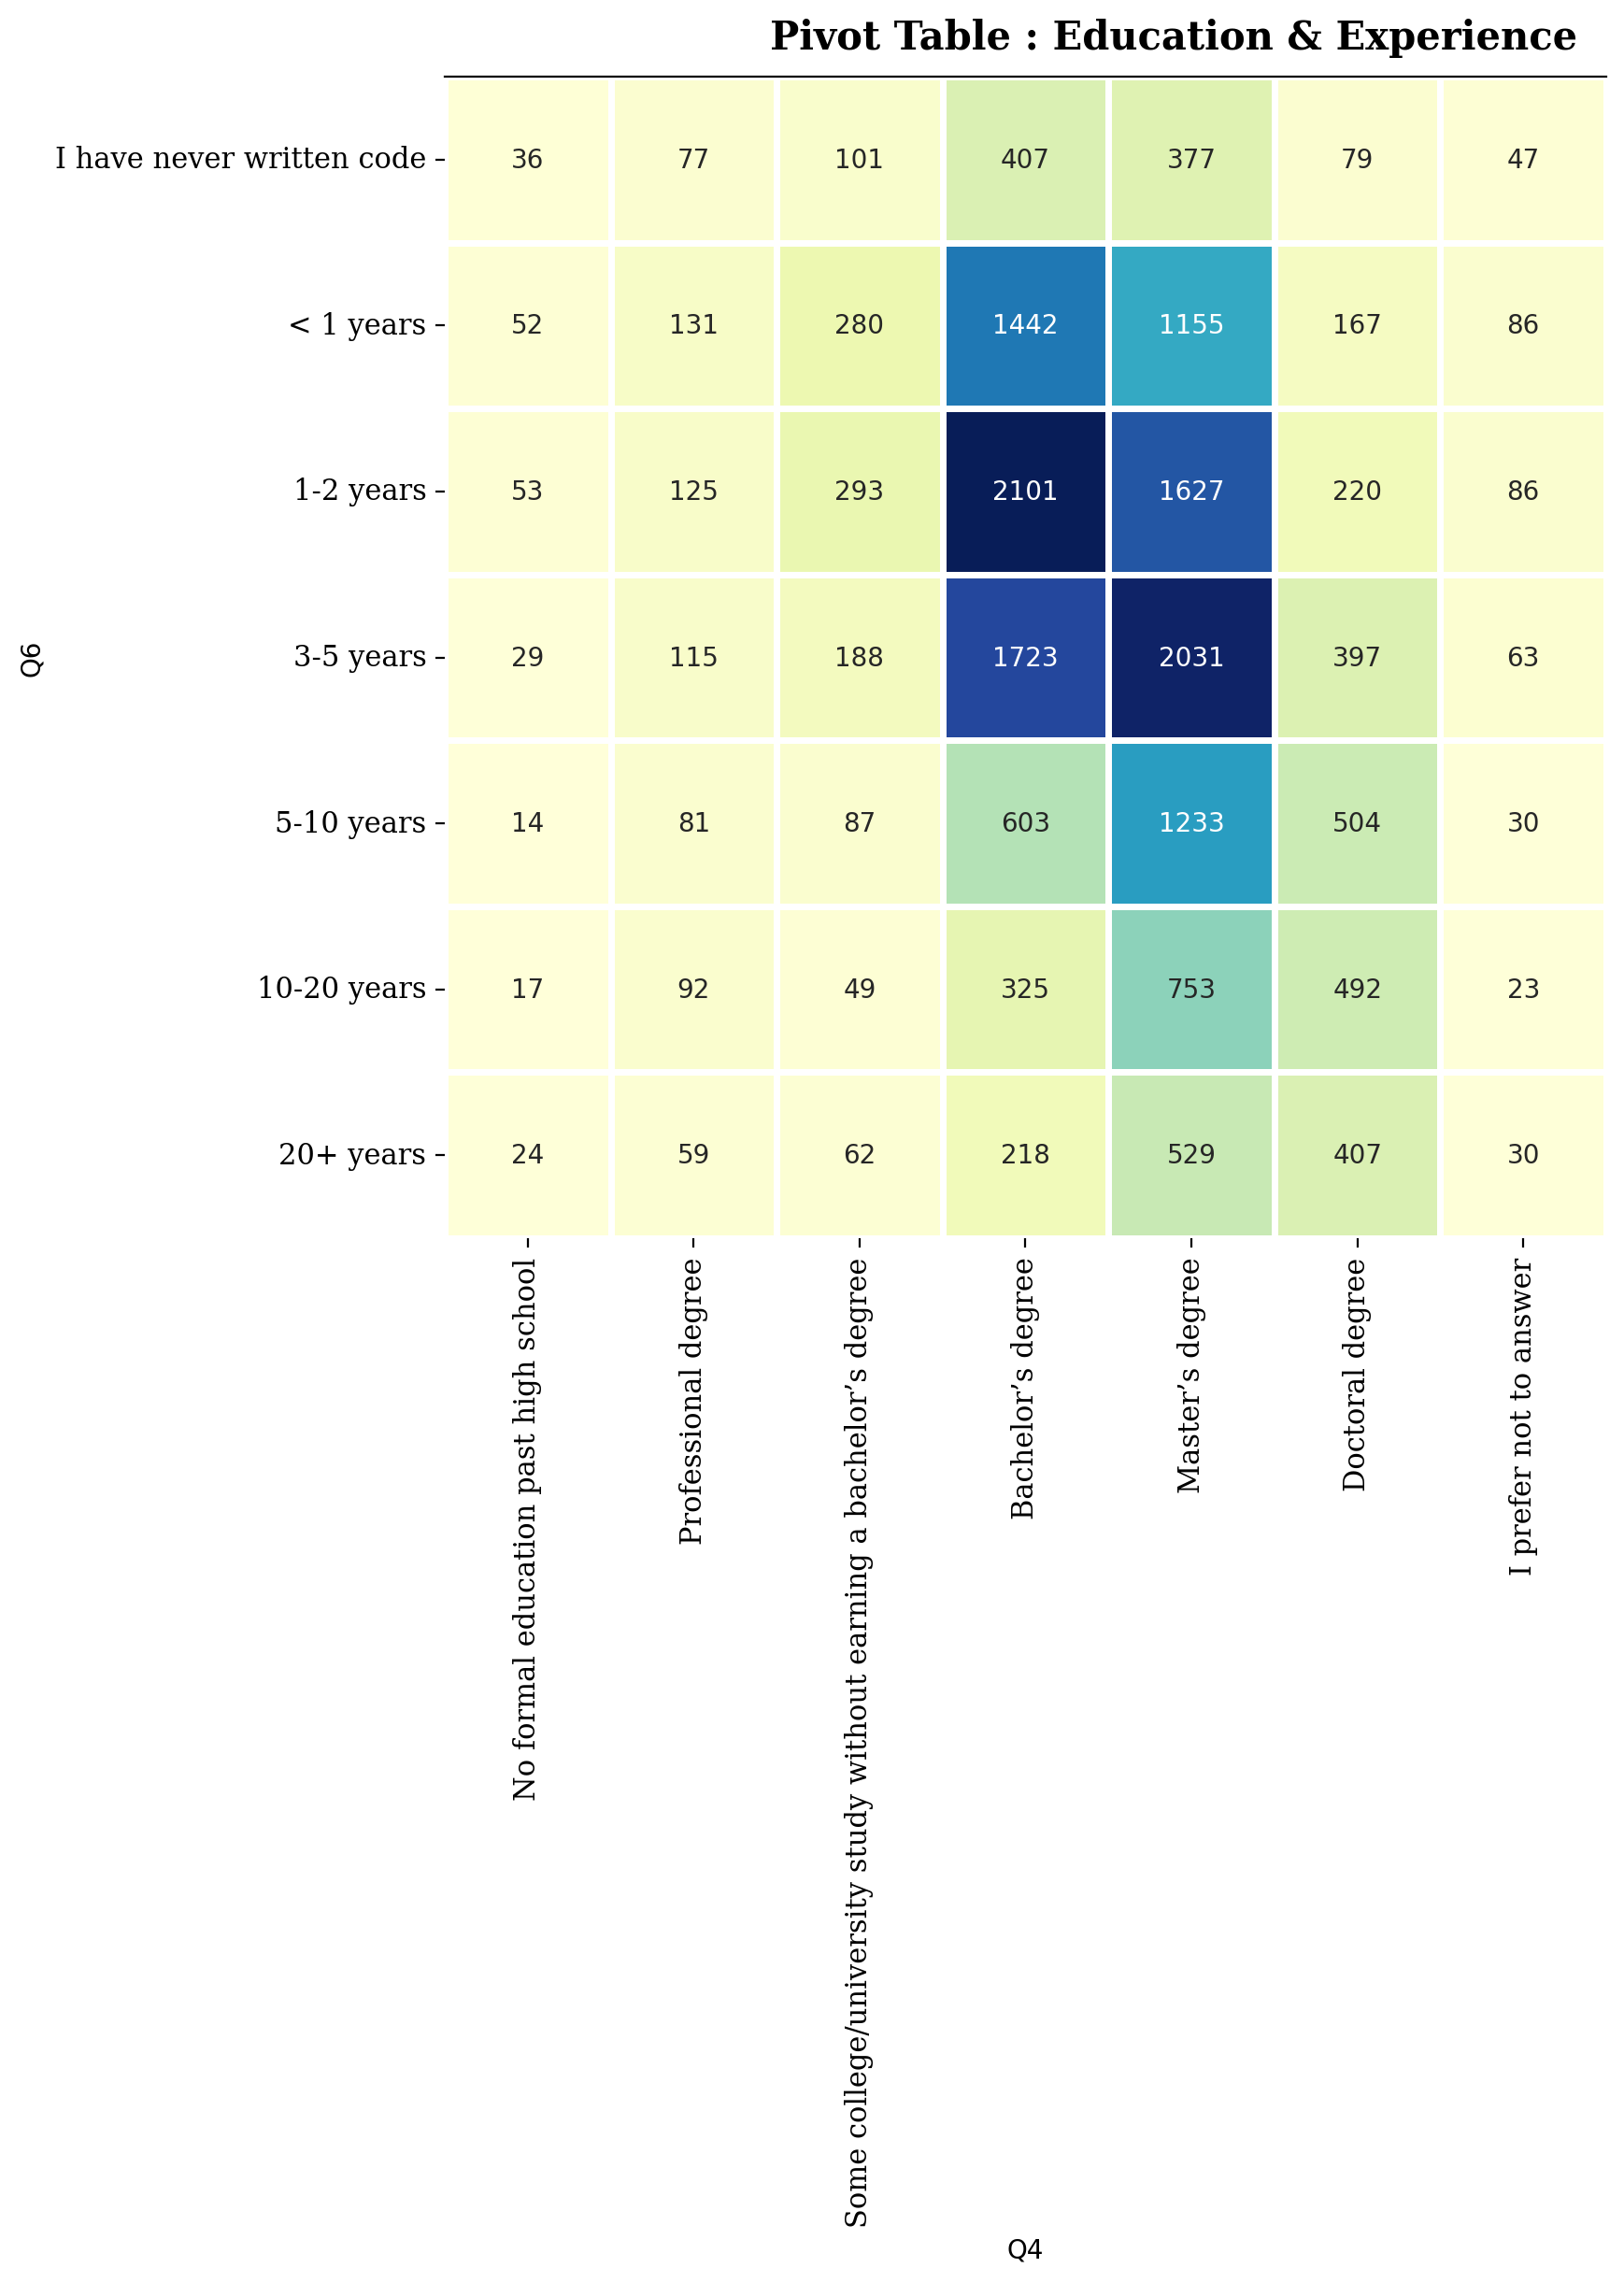

In [11]:
data['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order], 
            cmap="YlGnBu",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt="d"
           )

ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Pivot Table : Education & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

# Q14


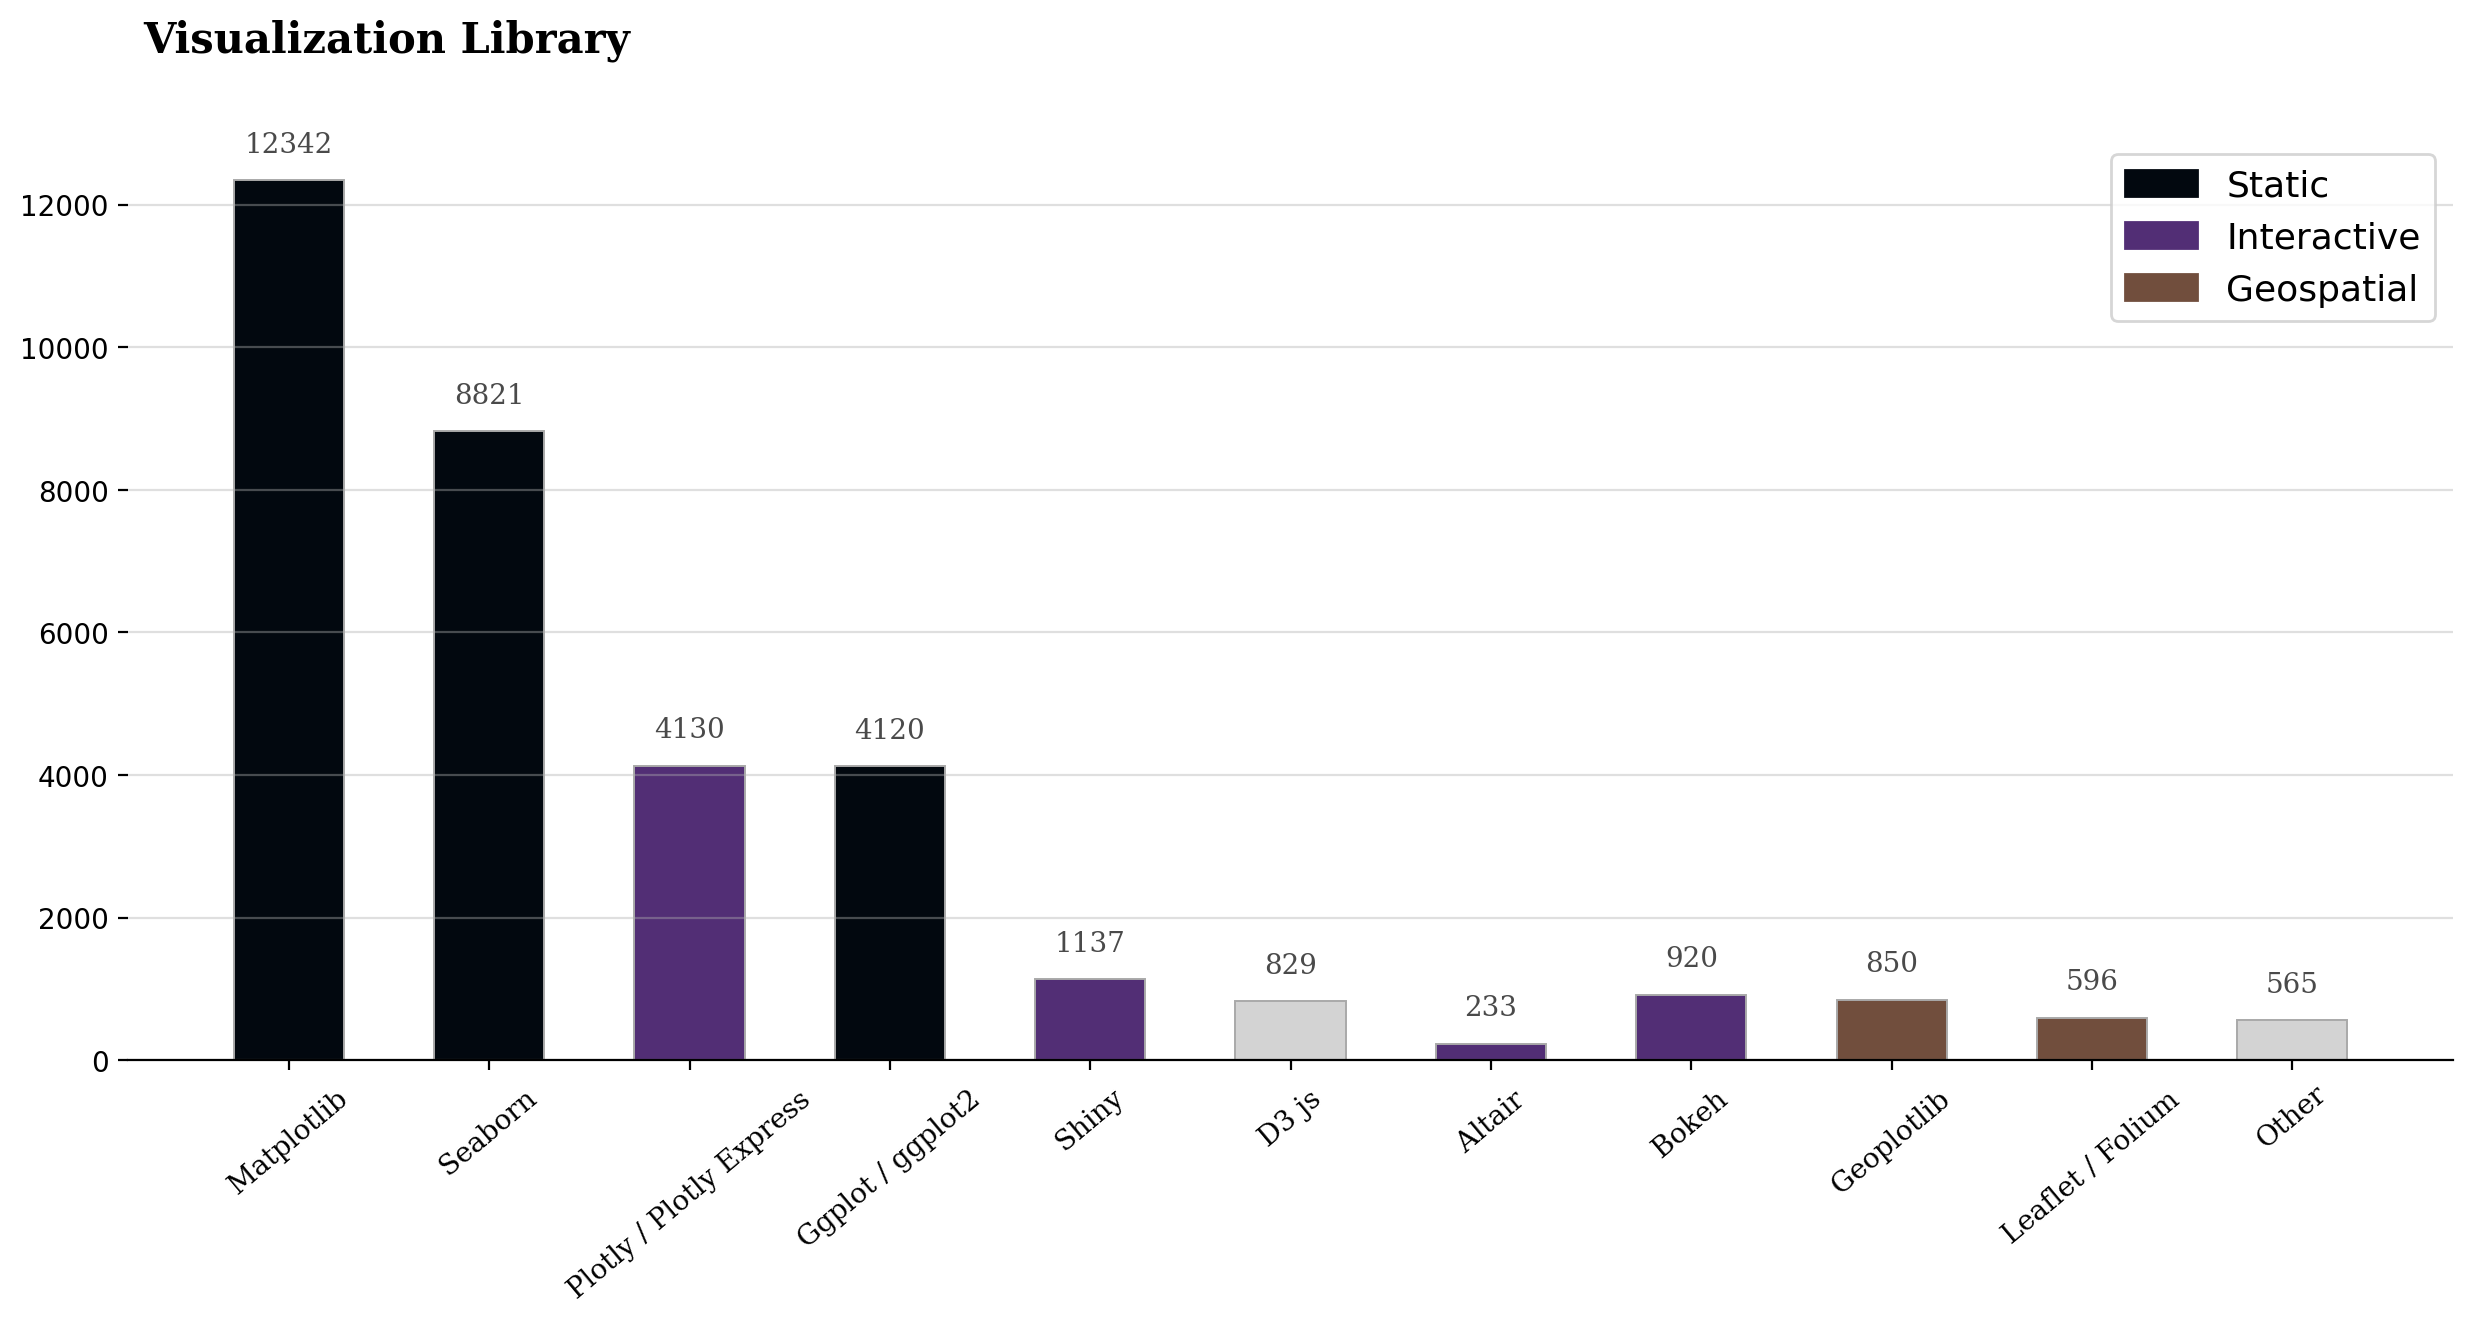

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load your data into a DataFrame
# data = pd.read_csv("your_data.csv") # Uncomment and specify your data source

# Extract Q14 related data (assuming "Q14" columns are prefixed or named accordingly)
data_q14 = data.filter(like='Q14')  # Adjust this line as needed for your dataset

# Create data_q14_count with valid counts only
data_q14_count = pd.Series(dtype='int')
for i in data_q14.columns:
    if not data_q14[i].value_counts().empty:  # Check if there are any values
        most_common_value = data_q14[i].value_counts().index[0]
        data_q14_count[most_common_value] = data_q14[i].count()

# Define colors for each category
colors = ['lightgray'] * len(data_q14_count)
colors[0] = colors[1] = colors[3] = '#02080F'          # Static visualization color
colors[2] = colors[4] = colors[6] = colors[7] = '#522e75'  # Interactive visualization color
colors[8] = colors[9] = '#714e3d'                      # Geospatial visualization color

# Plot the bar chart
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(data_q14_count.index, data_q14_count, width=0.55, 
       edgecolor='darkgray', color=colors,
       linewidth=0.7)

# Add annotations
for i in data_q14_count.index:
    ax.annotate(f"{data_q14_count[i]}", 
                xy=(i, data_q14_count[i] + 500),
                va='center', ha='center', fontweight='light', fontfamily='serif',
                color='#4a4a4a')

# Remove spines for a cleaner look
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Customize labels and title
ax.set_xticklabels(data_q14_count.index, fontfamily='serif', rotation=40)
fig.text(0.13, 0.95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Define and add legend
static = mpatches.Patch(color='#02080F', label='Static')
interactive = mpatches.Patch(color='#522e75', label='Interactive')
geo = mpatches.Patch(color='#714e3d', label='Geospatial')
plt.legend(handles=[static, interactive, geo], fontsize=13)

# Display the plot
plt.show()


#  Gender and Position their ML Experience

In [13]:
q5_order = ['Business Analyst'
 ,'Data Analyst'
 ,'Data Engineer'
 ,'Data Scientist'
 ,'DBA/Database Engineer'
 ,'Machine Learning Engineer'
 ,'Product/Project Manager'
 ,'Research Scientist'
 ,'Software Engineer'
 ,'Statistician'
 ,'Student'
 ,'Currently not employed'
 ,'Other']

q15_order = [
    'I do not use machine learning methods'
    ,'Under 1 year'
    ,'1-2 years'
    ,'2-3 years'
    ,'3-4 years'
    ,'4-5 years'
    ,'5-10 years'
    ,'10-20 years'
    ,'20 or more years']



data_q5q15 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_man = pd.pivot_table(data[data['Q2']=='Man'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()
data_q5q15_woman = pd.pivot_table(data[data['Q2']=='Woman'], values='count', index=['Q5'], columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()

In [14]:
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)

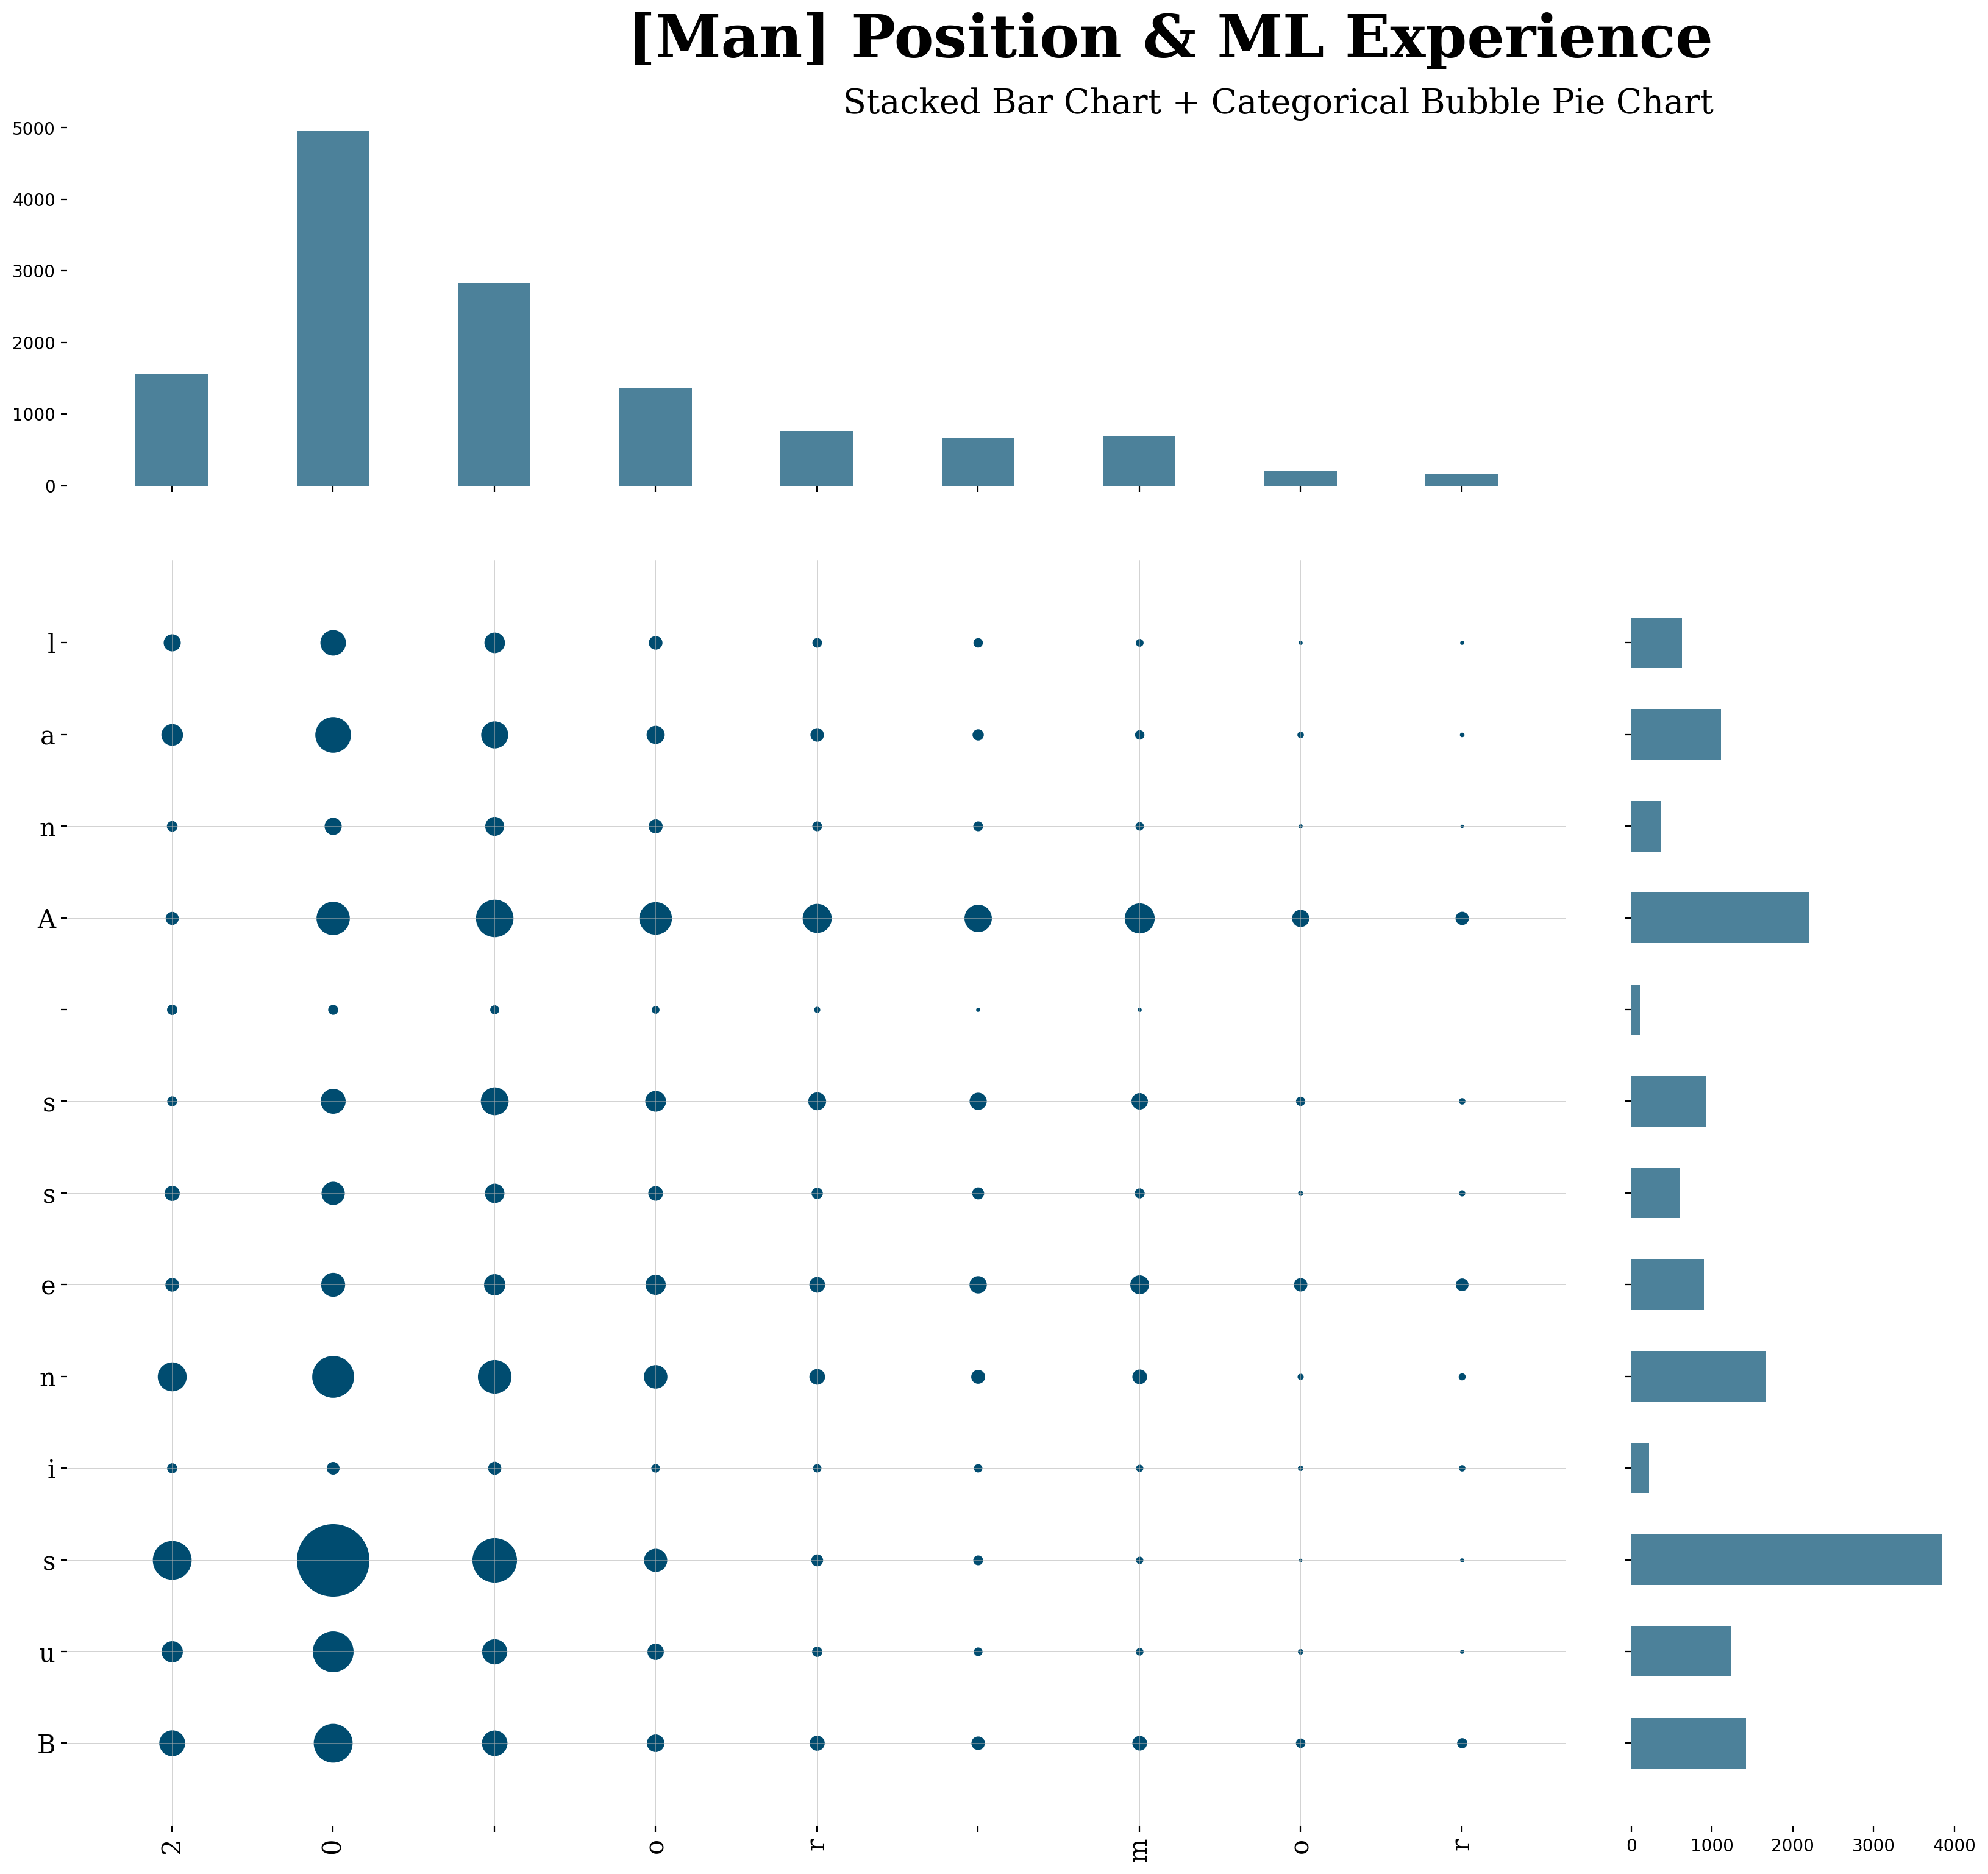

In [15]:
fig = plt.figure(figsize=(20, 23), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
        man = data_q5q15_man[q5_idx][q15_idx]
#         woman = data_q5q15_woman[q5_idx][q15_idx]
        ax_plot.scatter(q15_idx, q5_idx, s=man, color='#004c70')


ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.set_yticklabels(q5_idx, fontfamily='serif', fontsize=15)
ax_plot.set_xticklabels(q15_idx, fontfamily='serif', fontsize=15, rotation=90)

# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data[data['Q2']=='Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#004c70')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data[data['Q2']=='Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#004c70')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    

fig.text(0.8, 0.9, '[Man] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
# plt.tight_layout()
plt.show()

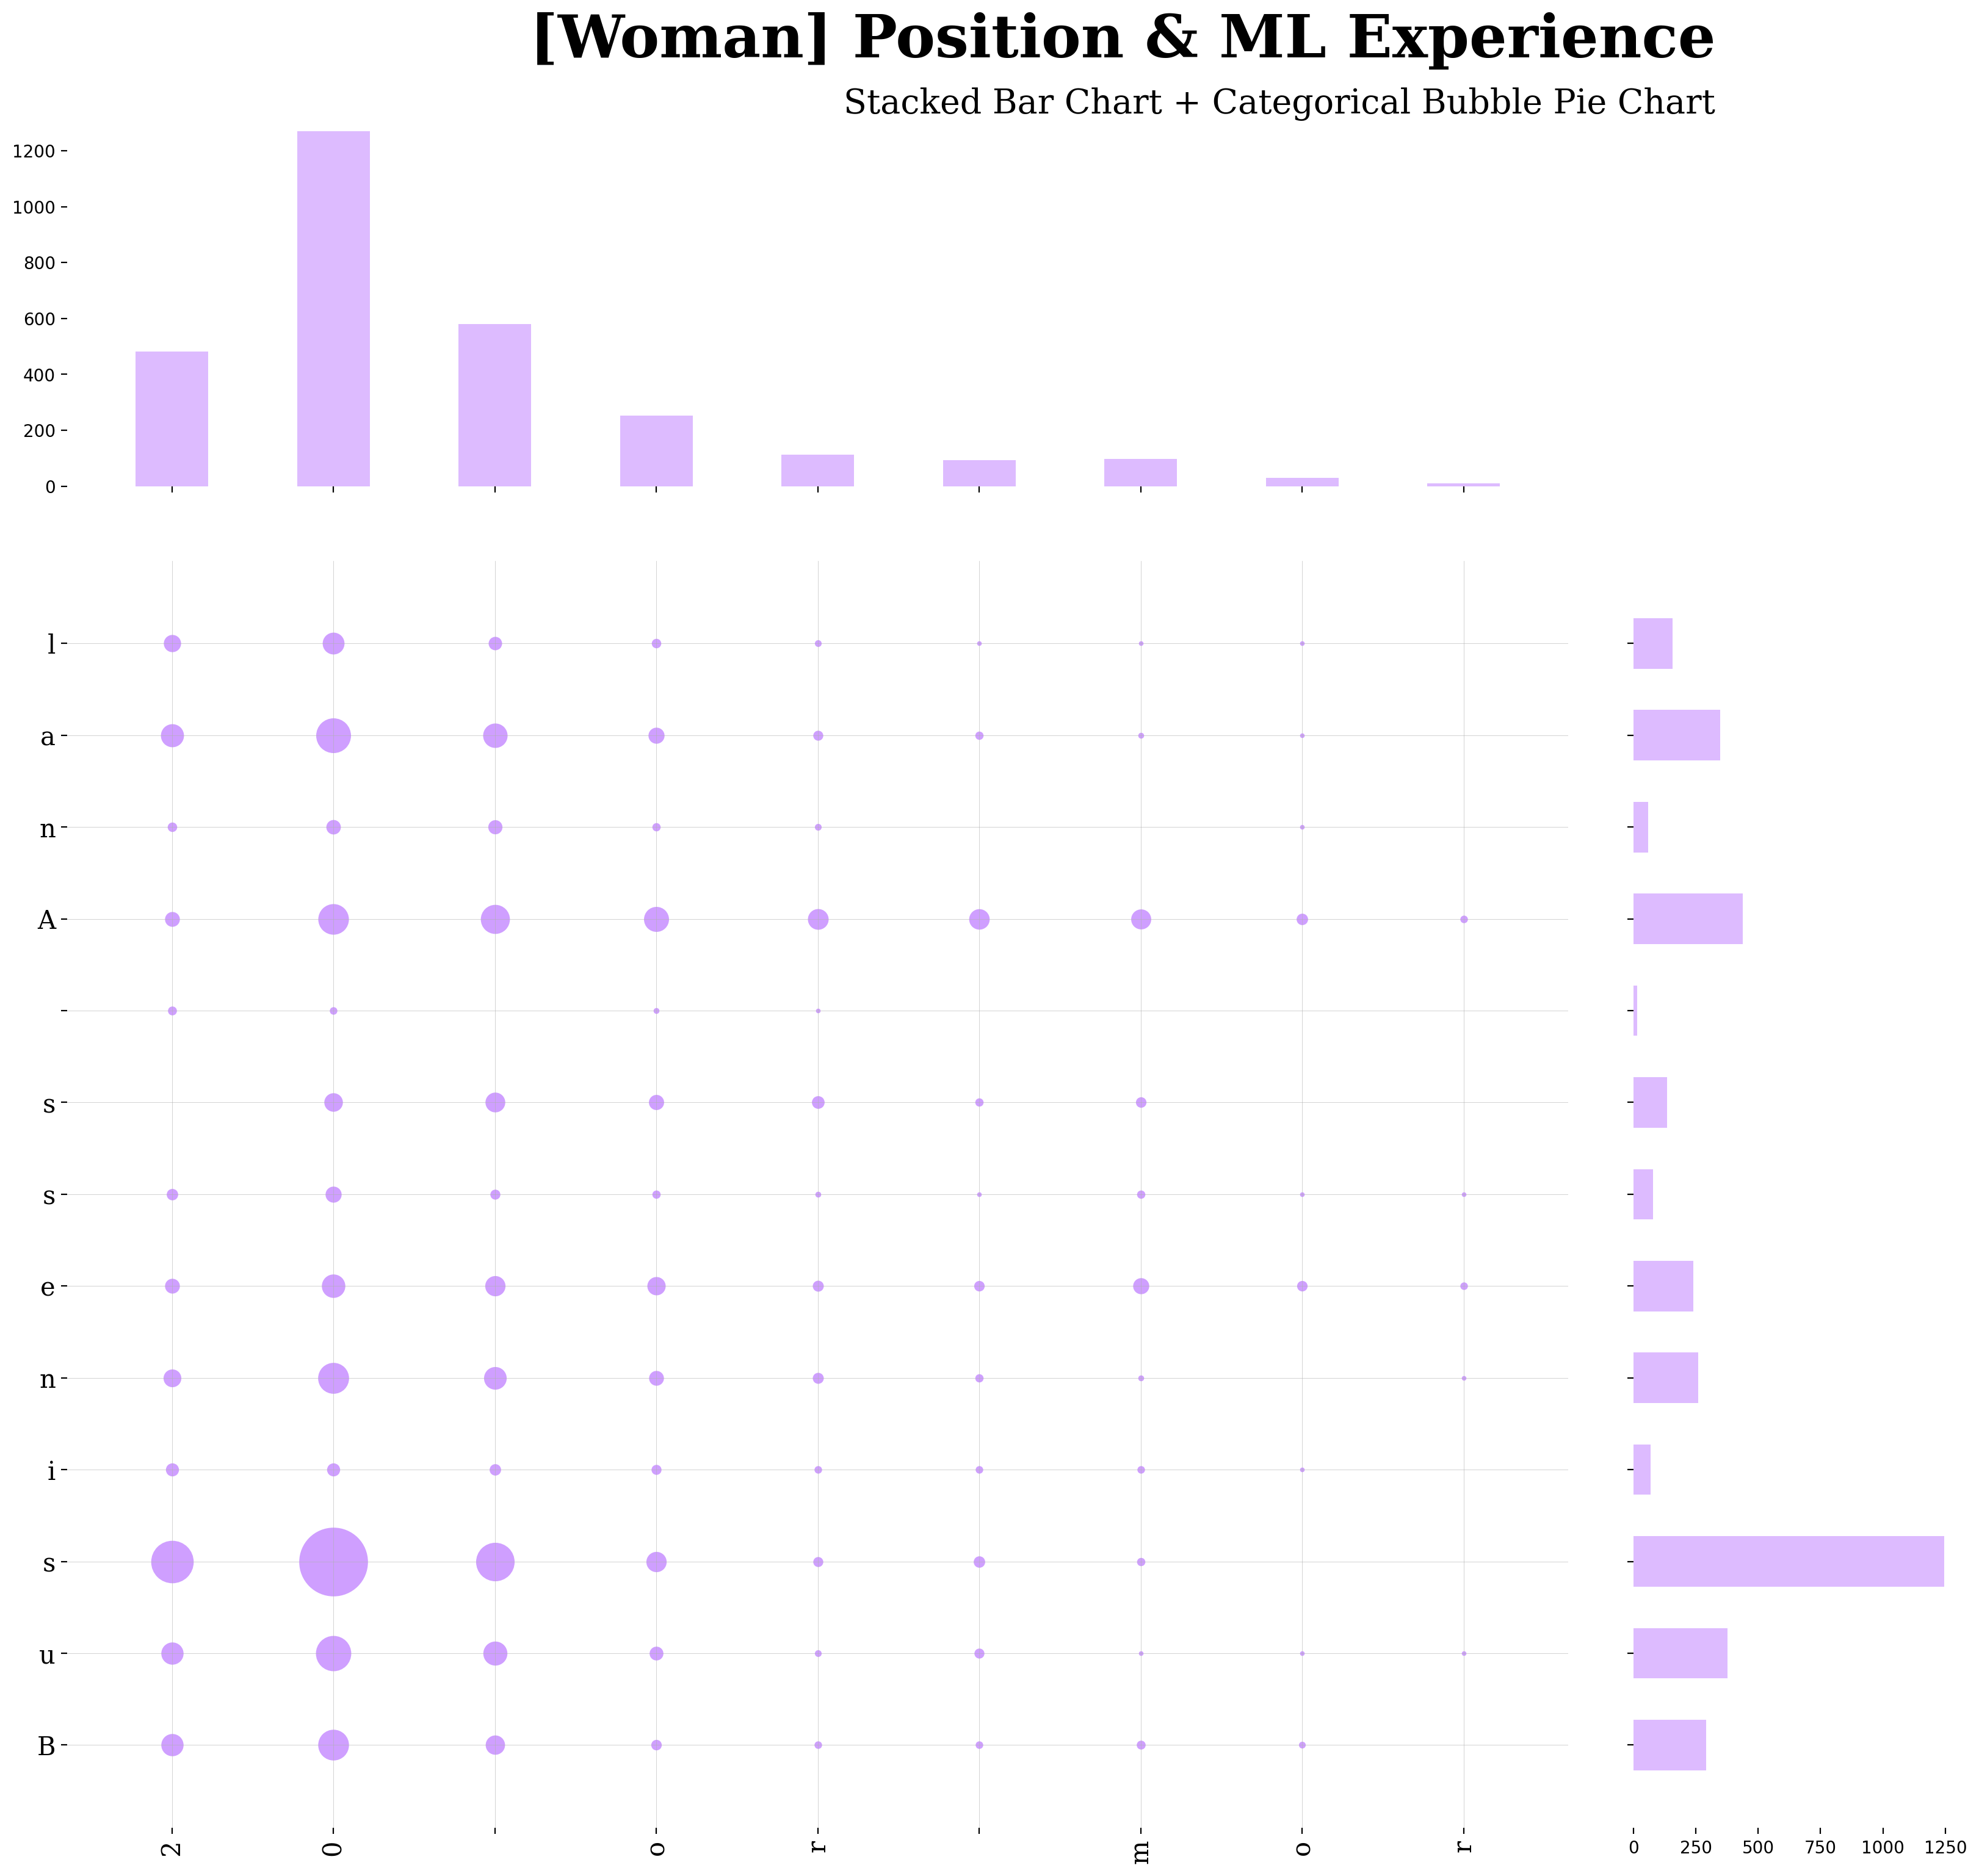

In [16]:
fig = plt.figure(figsize=(20, 23), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
#         man = data_q5q15_man[q5_idx][q15_idx]
        woman = data_q5q15_woman[q5_idx][q15_idx]
        ax_plot.scatter(q15_idx, q5_idx, s=woman*3, color='#CF9FFF')


ax_plot.grid(linewidth=0.2, zorder=0)        

ax_plot.set_yticklabels(q5_idx, fontfamily='serif', fontsize=15)
ax_plot.set_xticklabels(q15_idx, fontfamily='serif', fontsize=15, rotation=90)

# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data[data['Q2']=='Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#CF9FFF')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data[data['Q2']=='Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#CF9FFF')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    

fig.text(0.8, 0.9, '[Woman] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
# plt.tight_layout()
plt.show()

# current yearly compensation 

In [17]:
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
'10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999',
'100,000-124,999', '125,000-149,999',  '150,000-199,999', '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']

data_q24 = data['Q24'].value_counts()[q24_order]

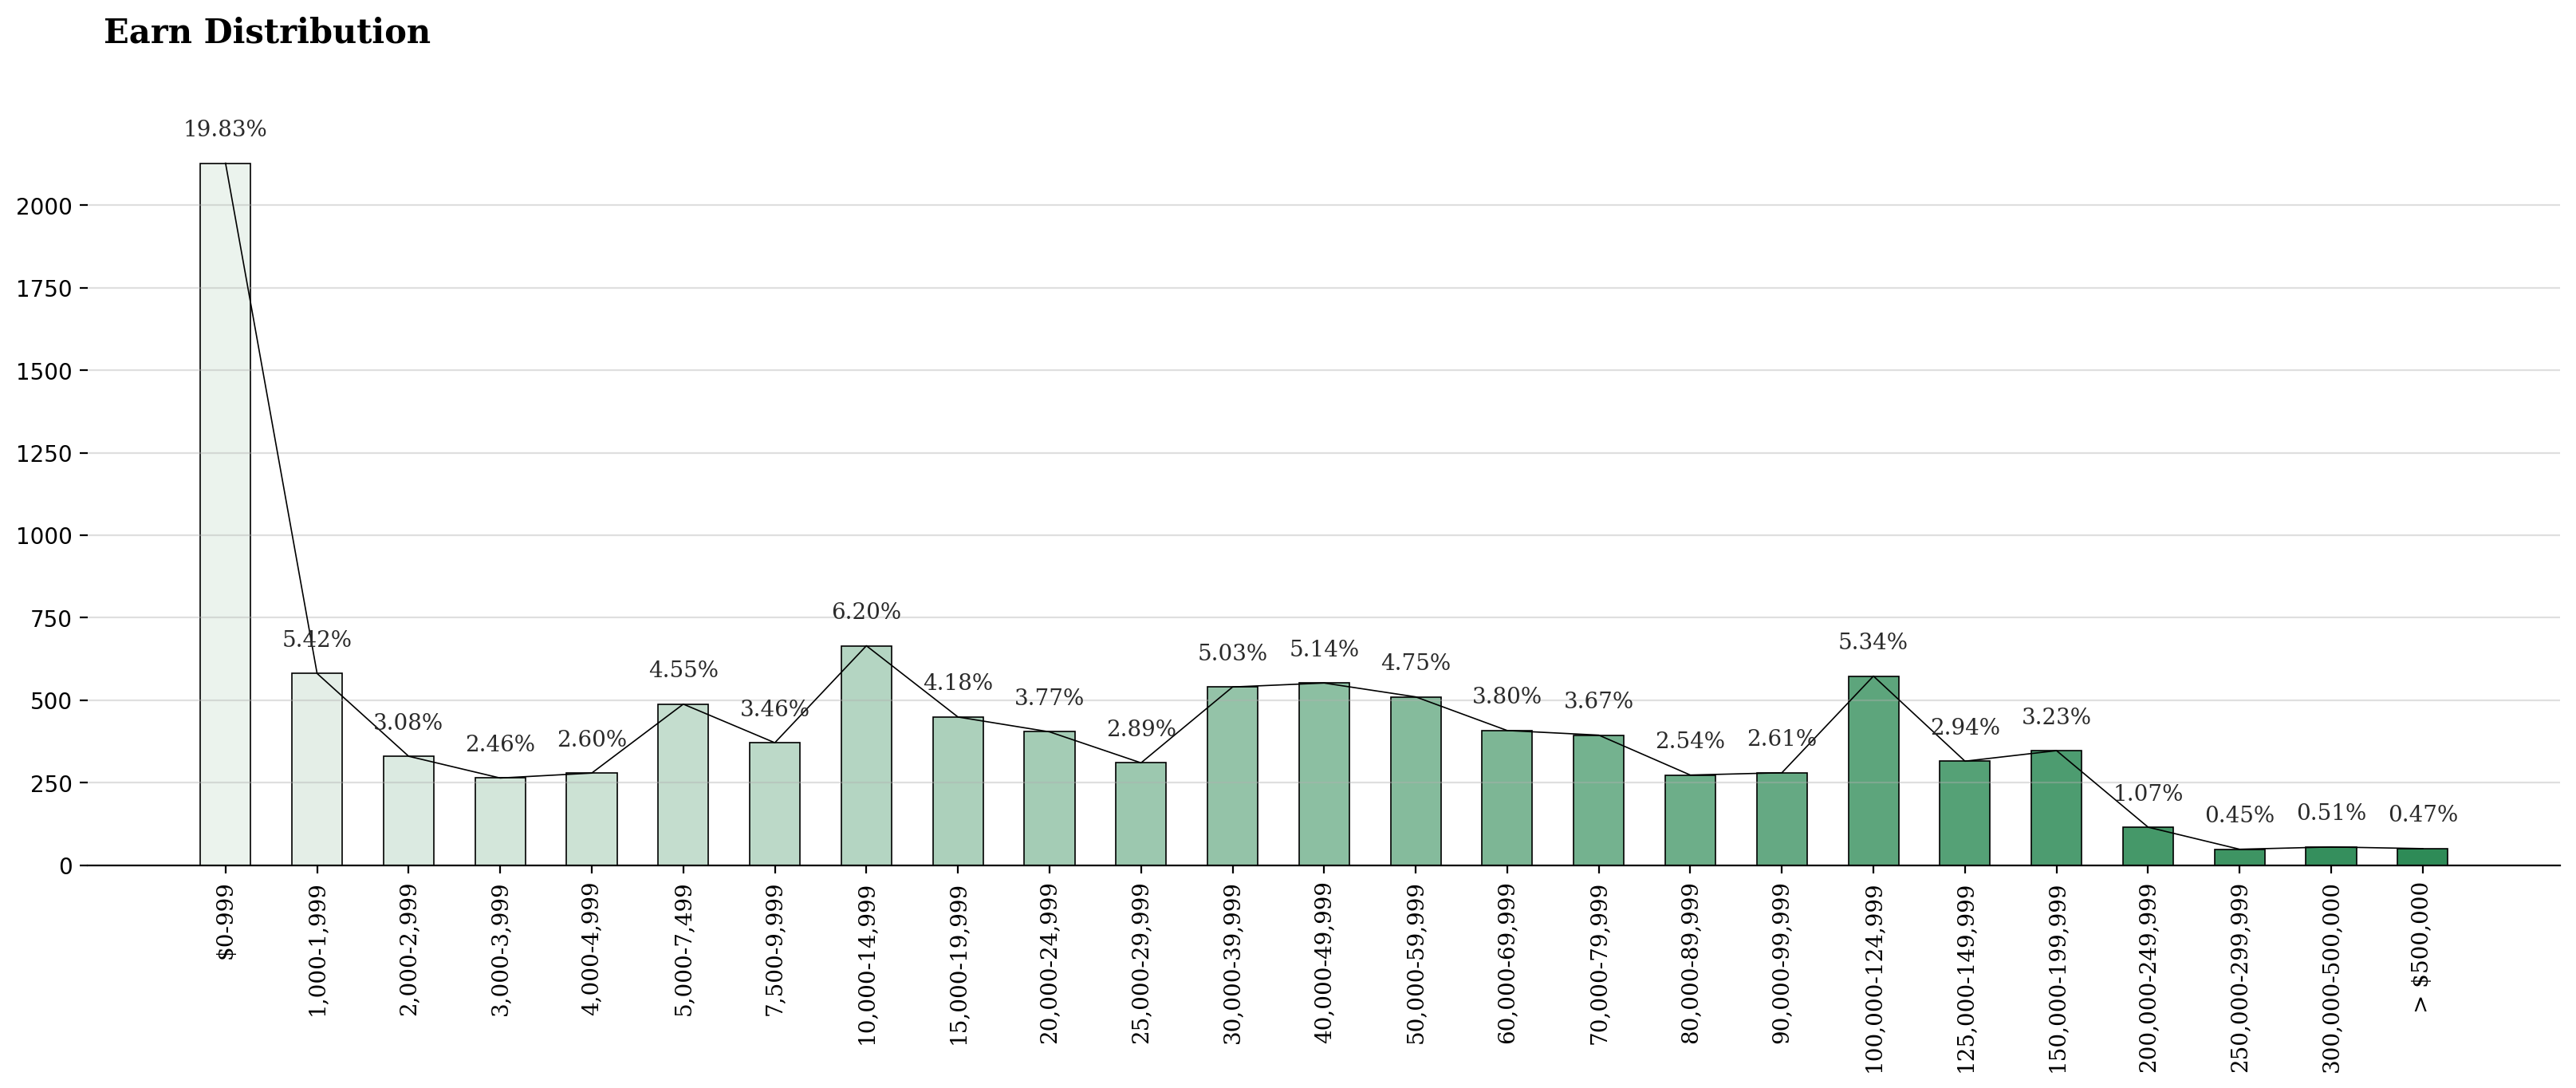

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20, 6), dpi=200)
ax.bar(data_q24.index, data_q24, width=0.55, 
       edgecolor='black', color=sns.light_palette("seagreen", len(data_q24)),
       linewidth=0.6)

ax.plot(data_q24.index, data_q24, c='k', linewidth=0.6)

for i in data_q24.index:
    ax.annotate(f"{data_q24[i]/data_q24.sum()*100:.2f}%", 
                   xy=(i, data_q24[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#2a2a2a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q24.index, fontfamily='serif', rotation=90)

fig.text(0.13, 0.97, 'Earn Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()


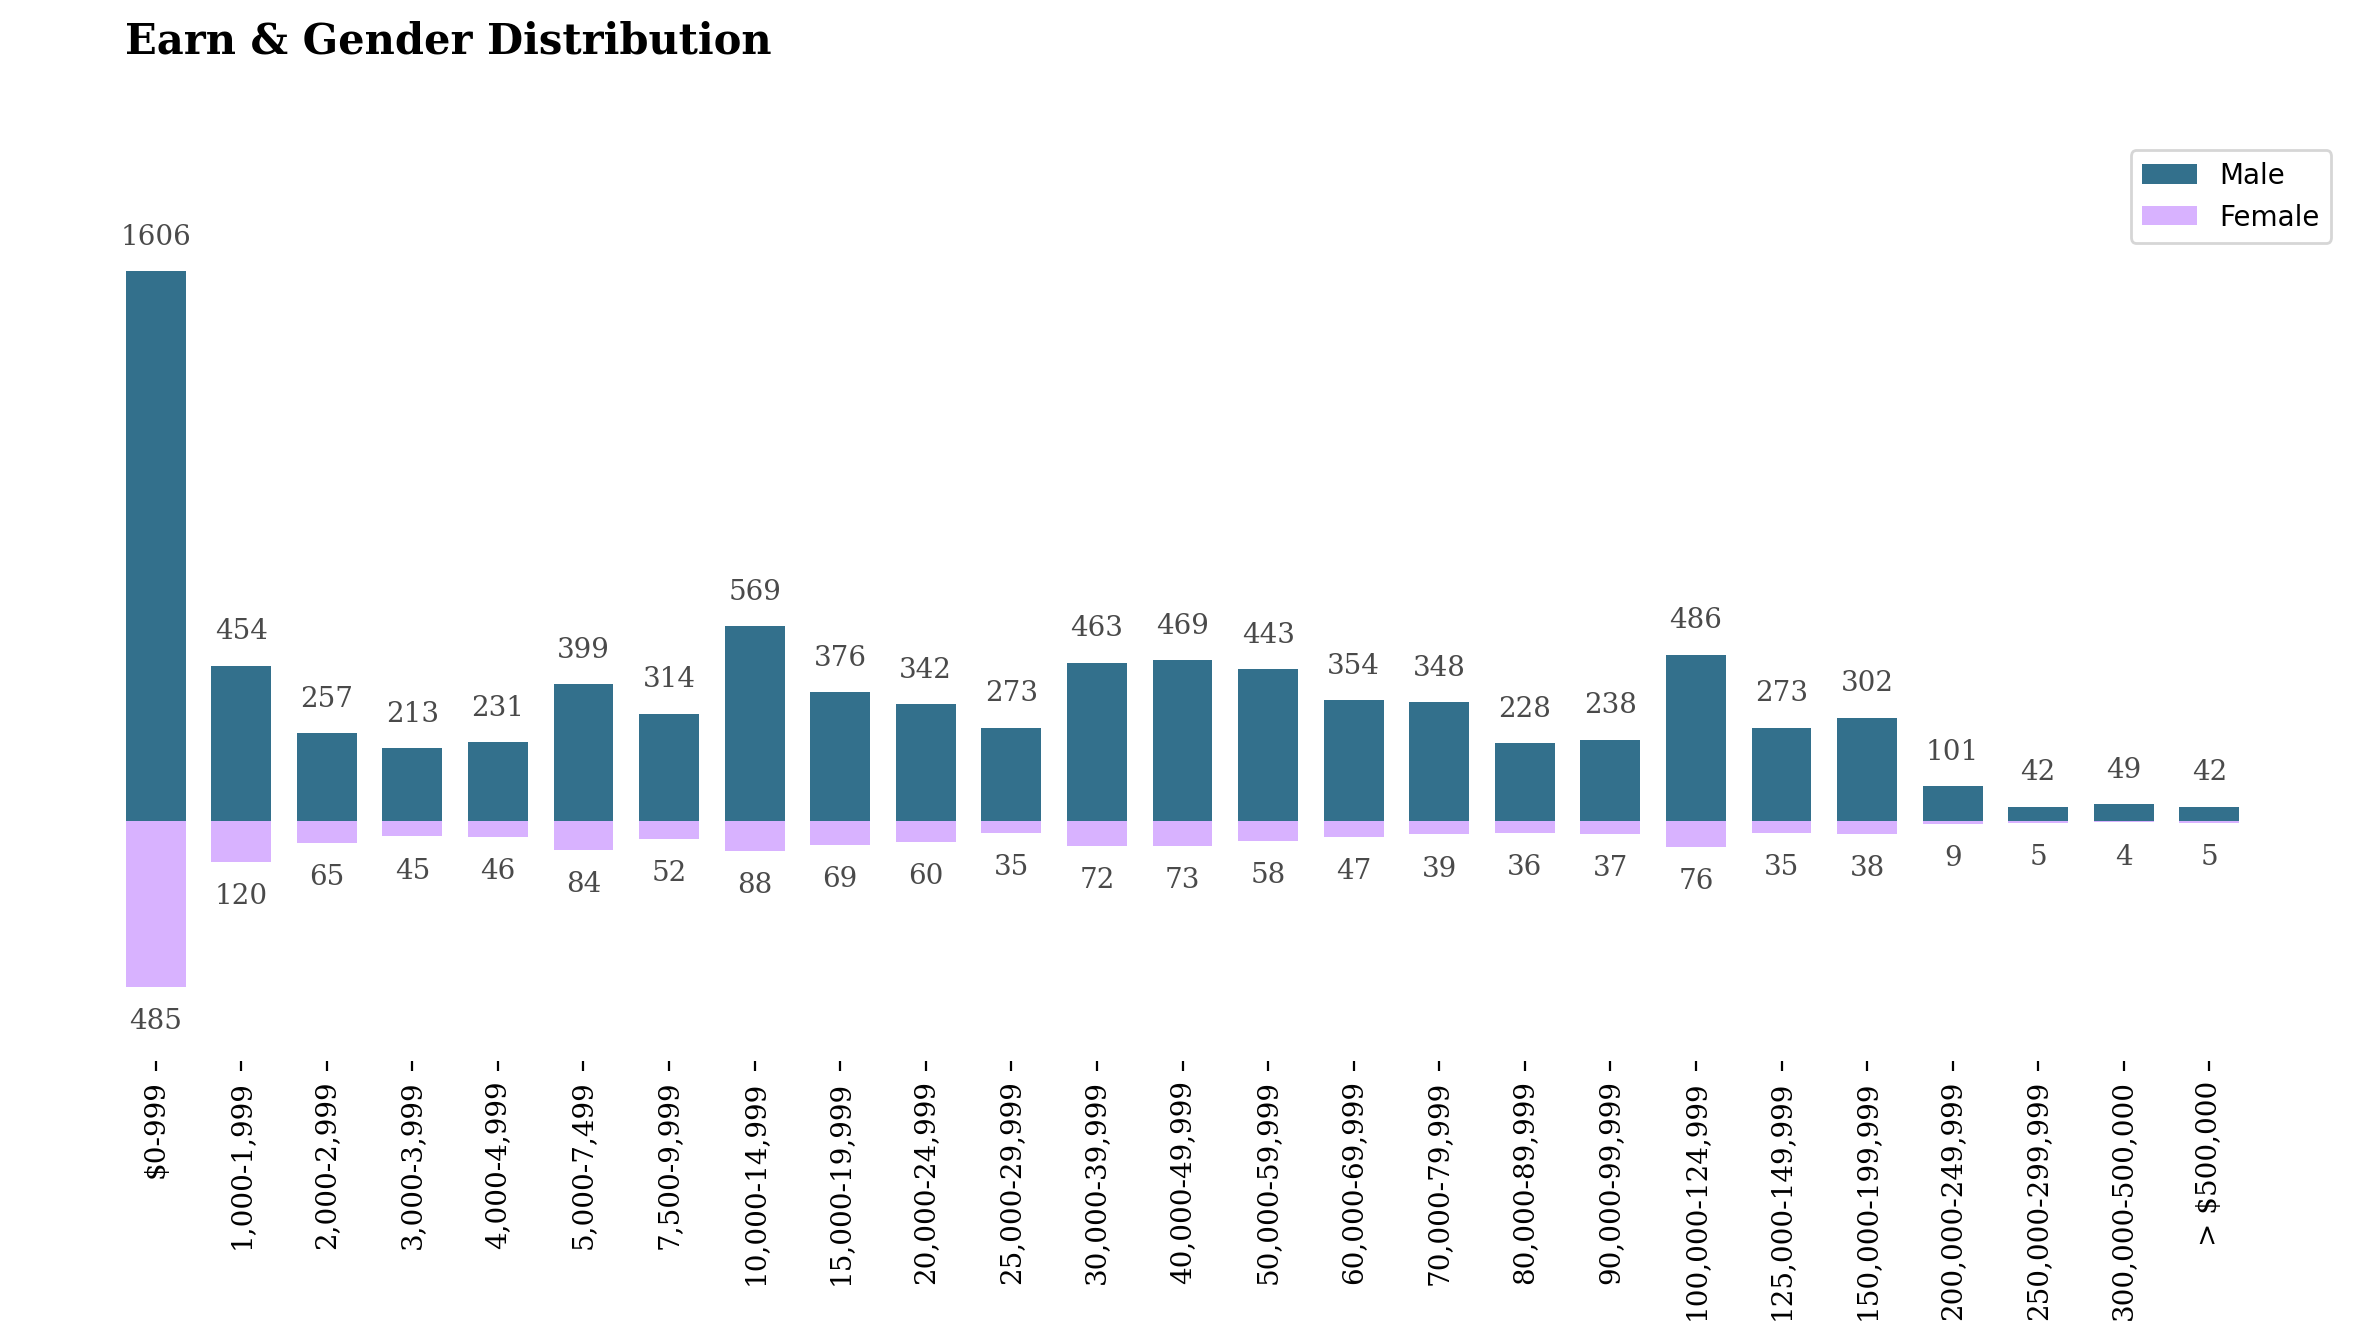

In [19]:
man = data[data['Q2']=='Man']['Q24'].value_counts()[q24_order]
woman = -data[data['Q2']=='Woman']['Q24'].value_counts()[q24_order]

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.7, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.7, color='#CF9FFF', alpha=0.8, label='Female')
ax.set_ylim(-700, 2000)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax.set_yticks([])   
ax.legend()
fig.text(0.16, 0.95, 'Earn & Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

In [20]:
data_q5q24 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[:,q24_order]

data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1)).cumsum()

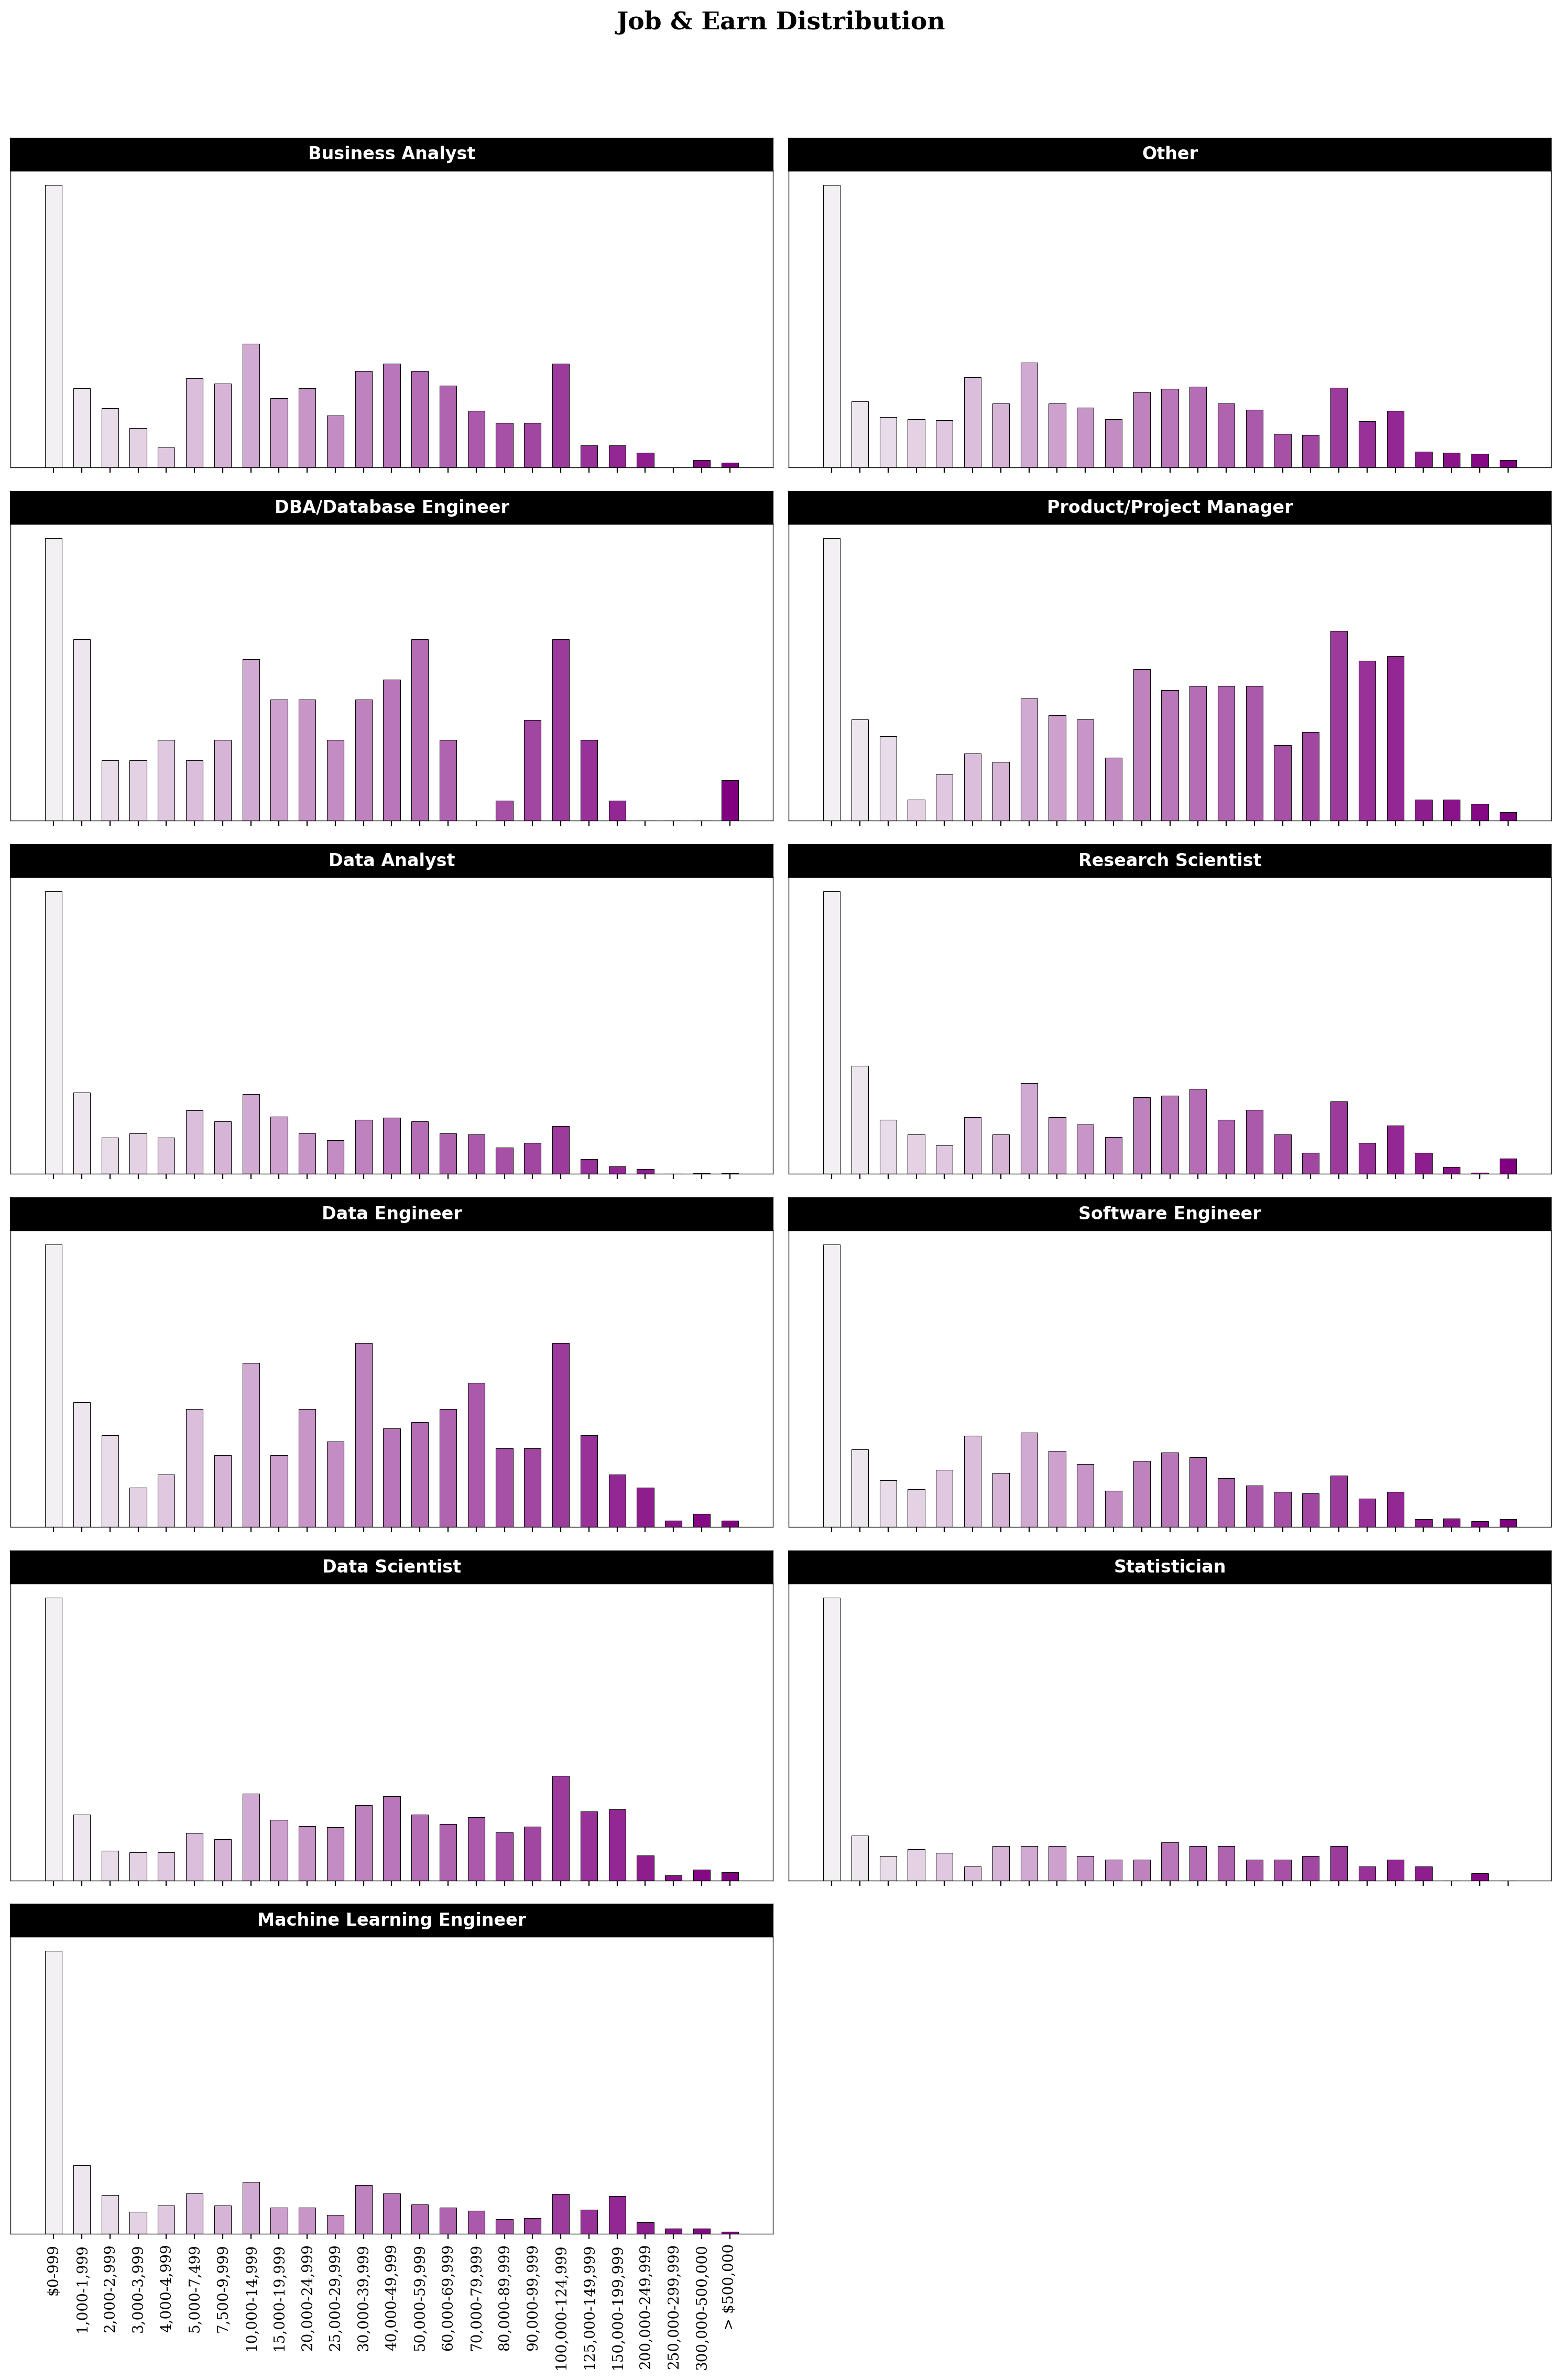

In [21]:
data_q5q24 = pd.pivot_table(data, values='count', index=['Q5'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[:,q24_order]
data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1))#.rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

colors=sns.light_palette("purple", len(data_q24))

fig, ax = plt.subplots(6, 2,figsize=(15, 22), sharex=True)

for idx, q5_idx in enumerate(data_q5q24.columns):


    ax[idx%6][idx//6].bar(data_q5q24[q5_idx].index, data_q5q24[q5_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%6][idx//6].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%6][idx//6].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%6][idx//6])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q5_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)

ax[-1][-1].set_visible(False)

fig.suptitle('Job & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

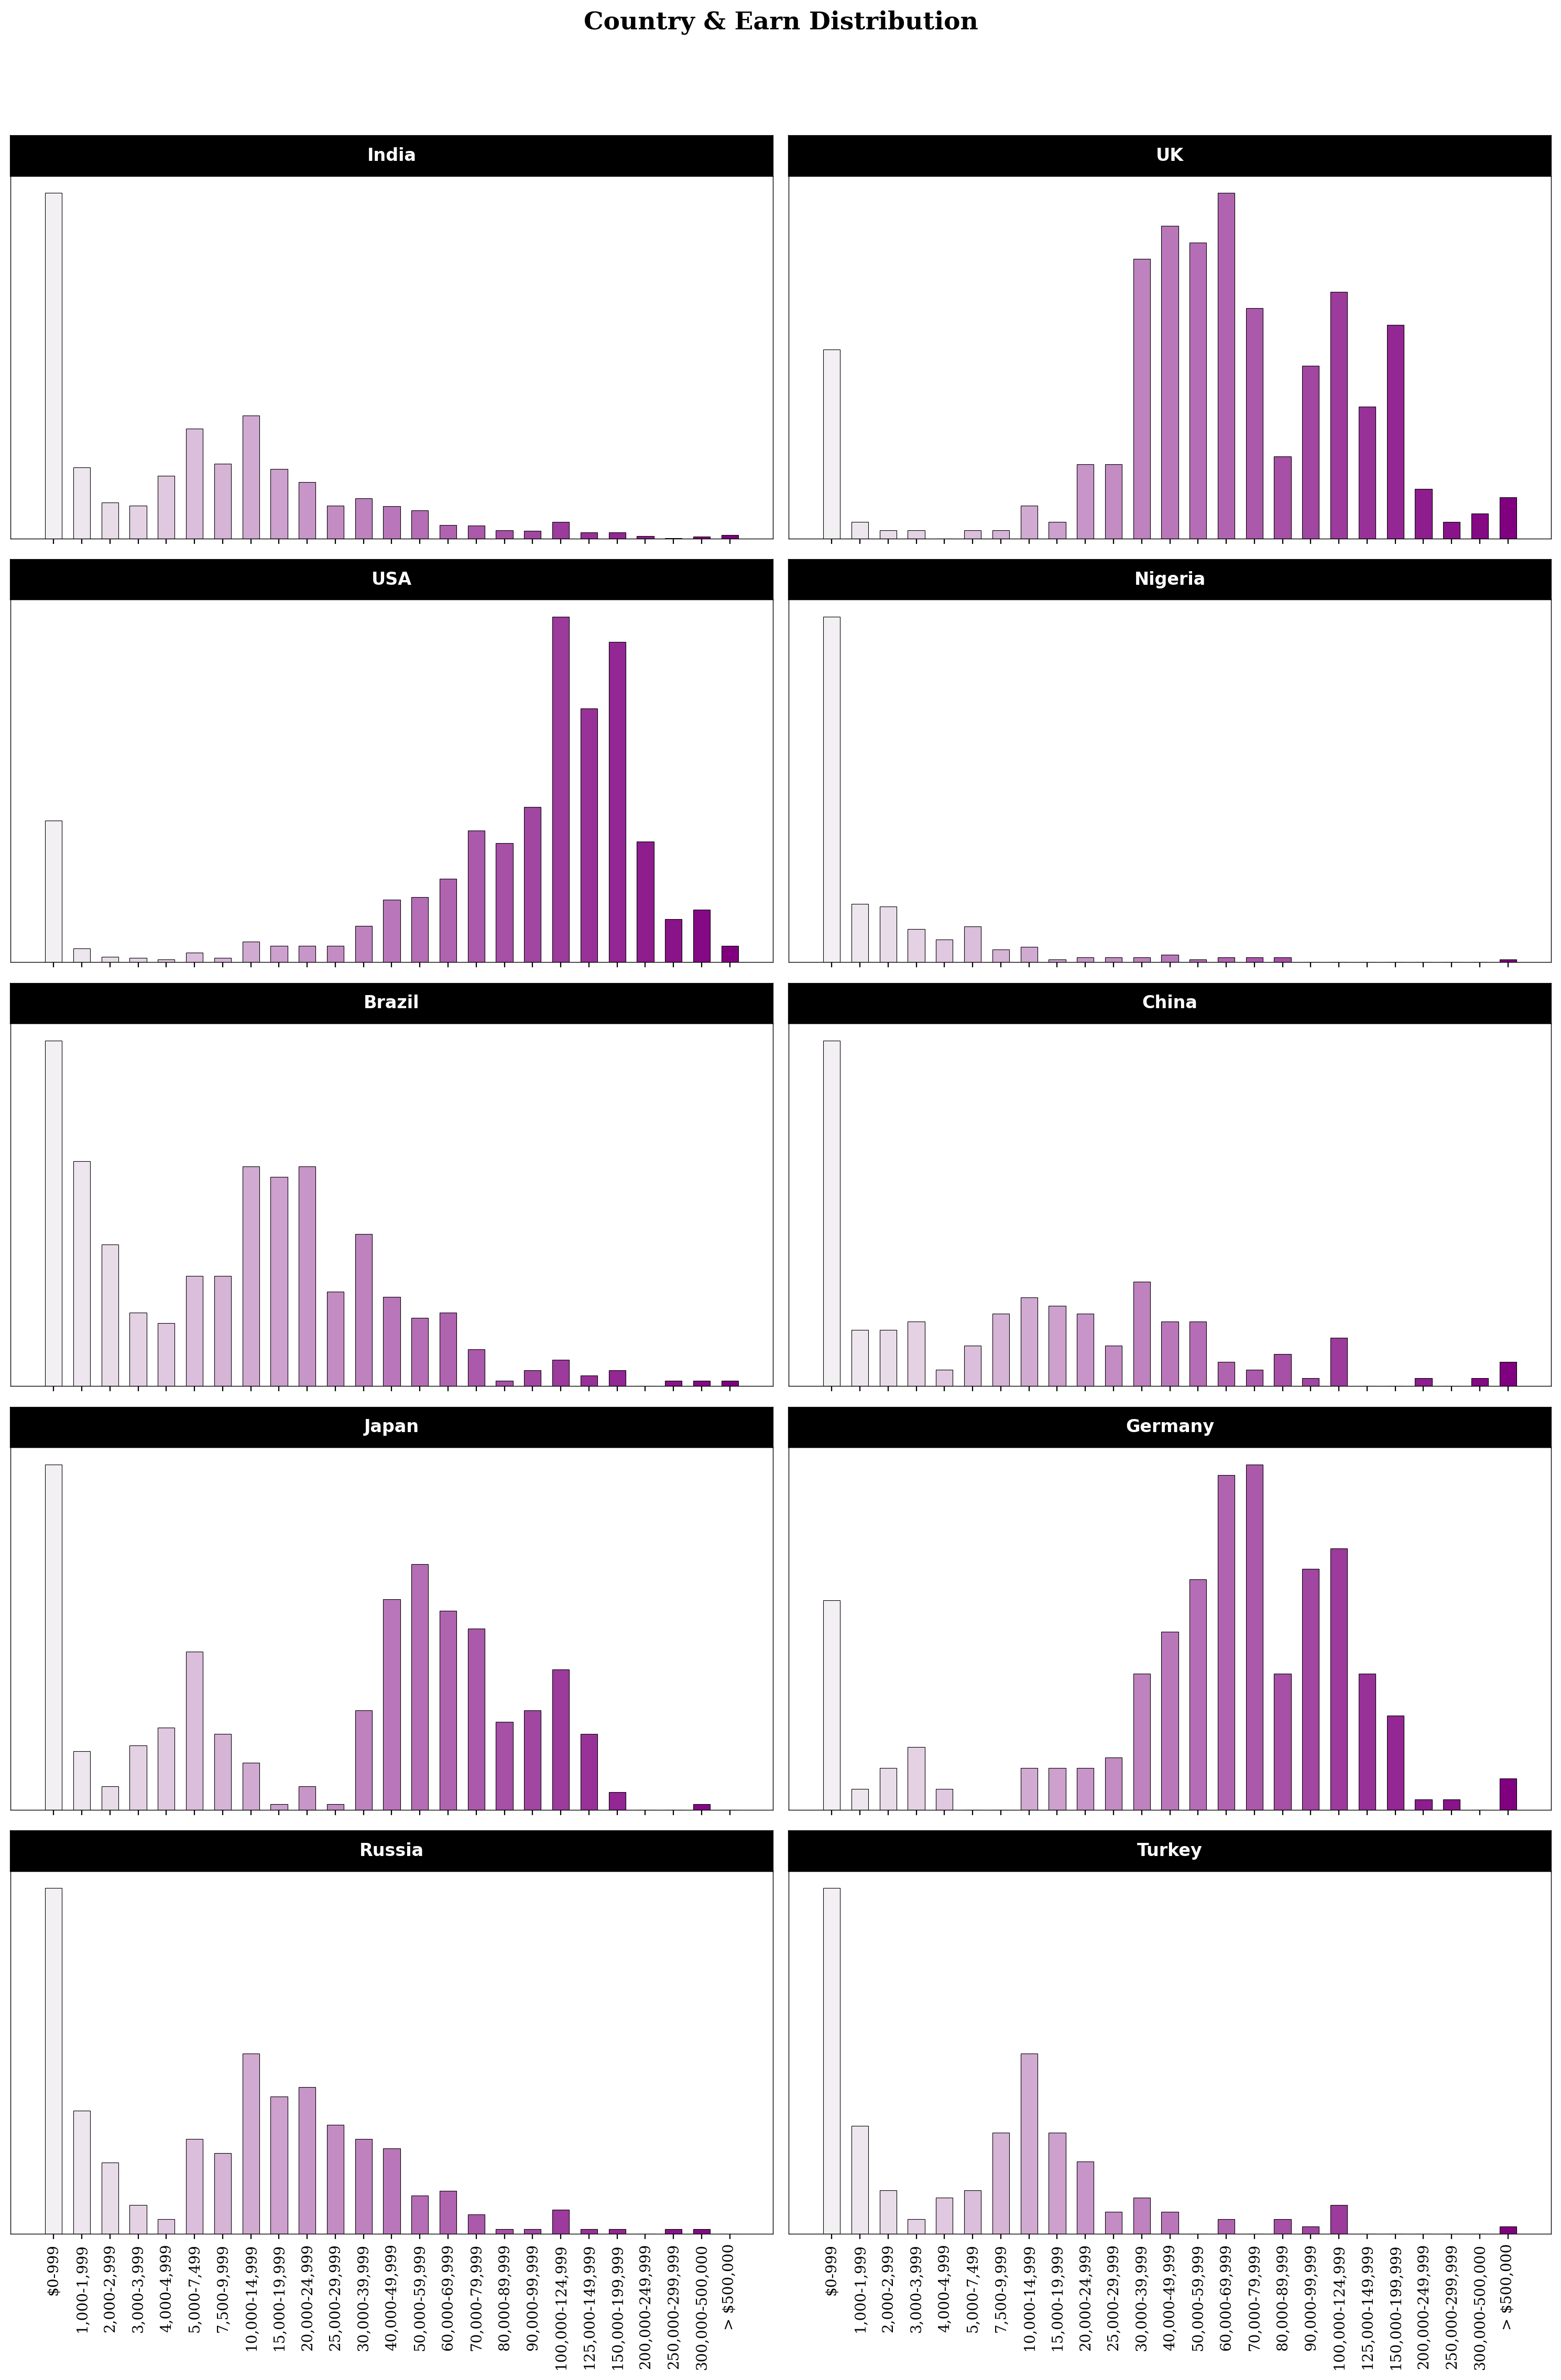

In [22]:
data_q3q24 = pd.pivot_table(data, values='count', index=['Q3'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[q3_order,q24_order]
data_q3q24 = (data_q3q24.T /data_q3q24.sum(axis=1)).rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

fig, ax = plt.subplots(5, 2,figsize=(15, 22), sharex=True)

for idx, q3_idx in enumerate(data_q3q24.columns):


    ax[idx%5][idx//5].bar(data_q3q24[q3_idx].index, data_q3q24[q3_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%5][idx//5].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%5][idx//5].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%5][idx//5])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q3_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)

fig.suptitle('Country & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

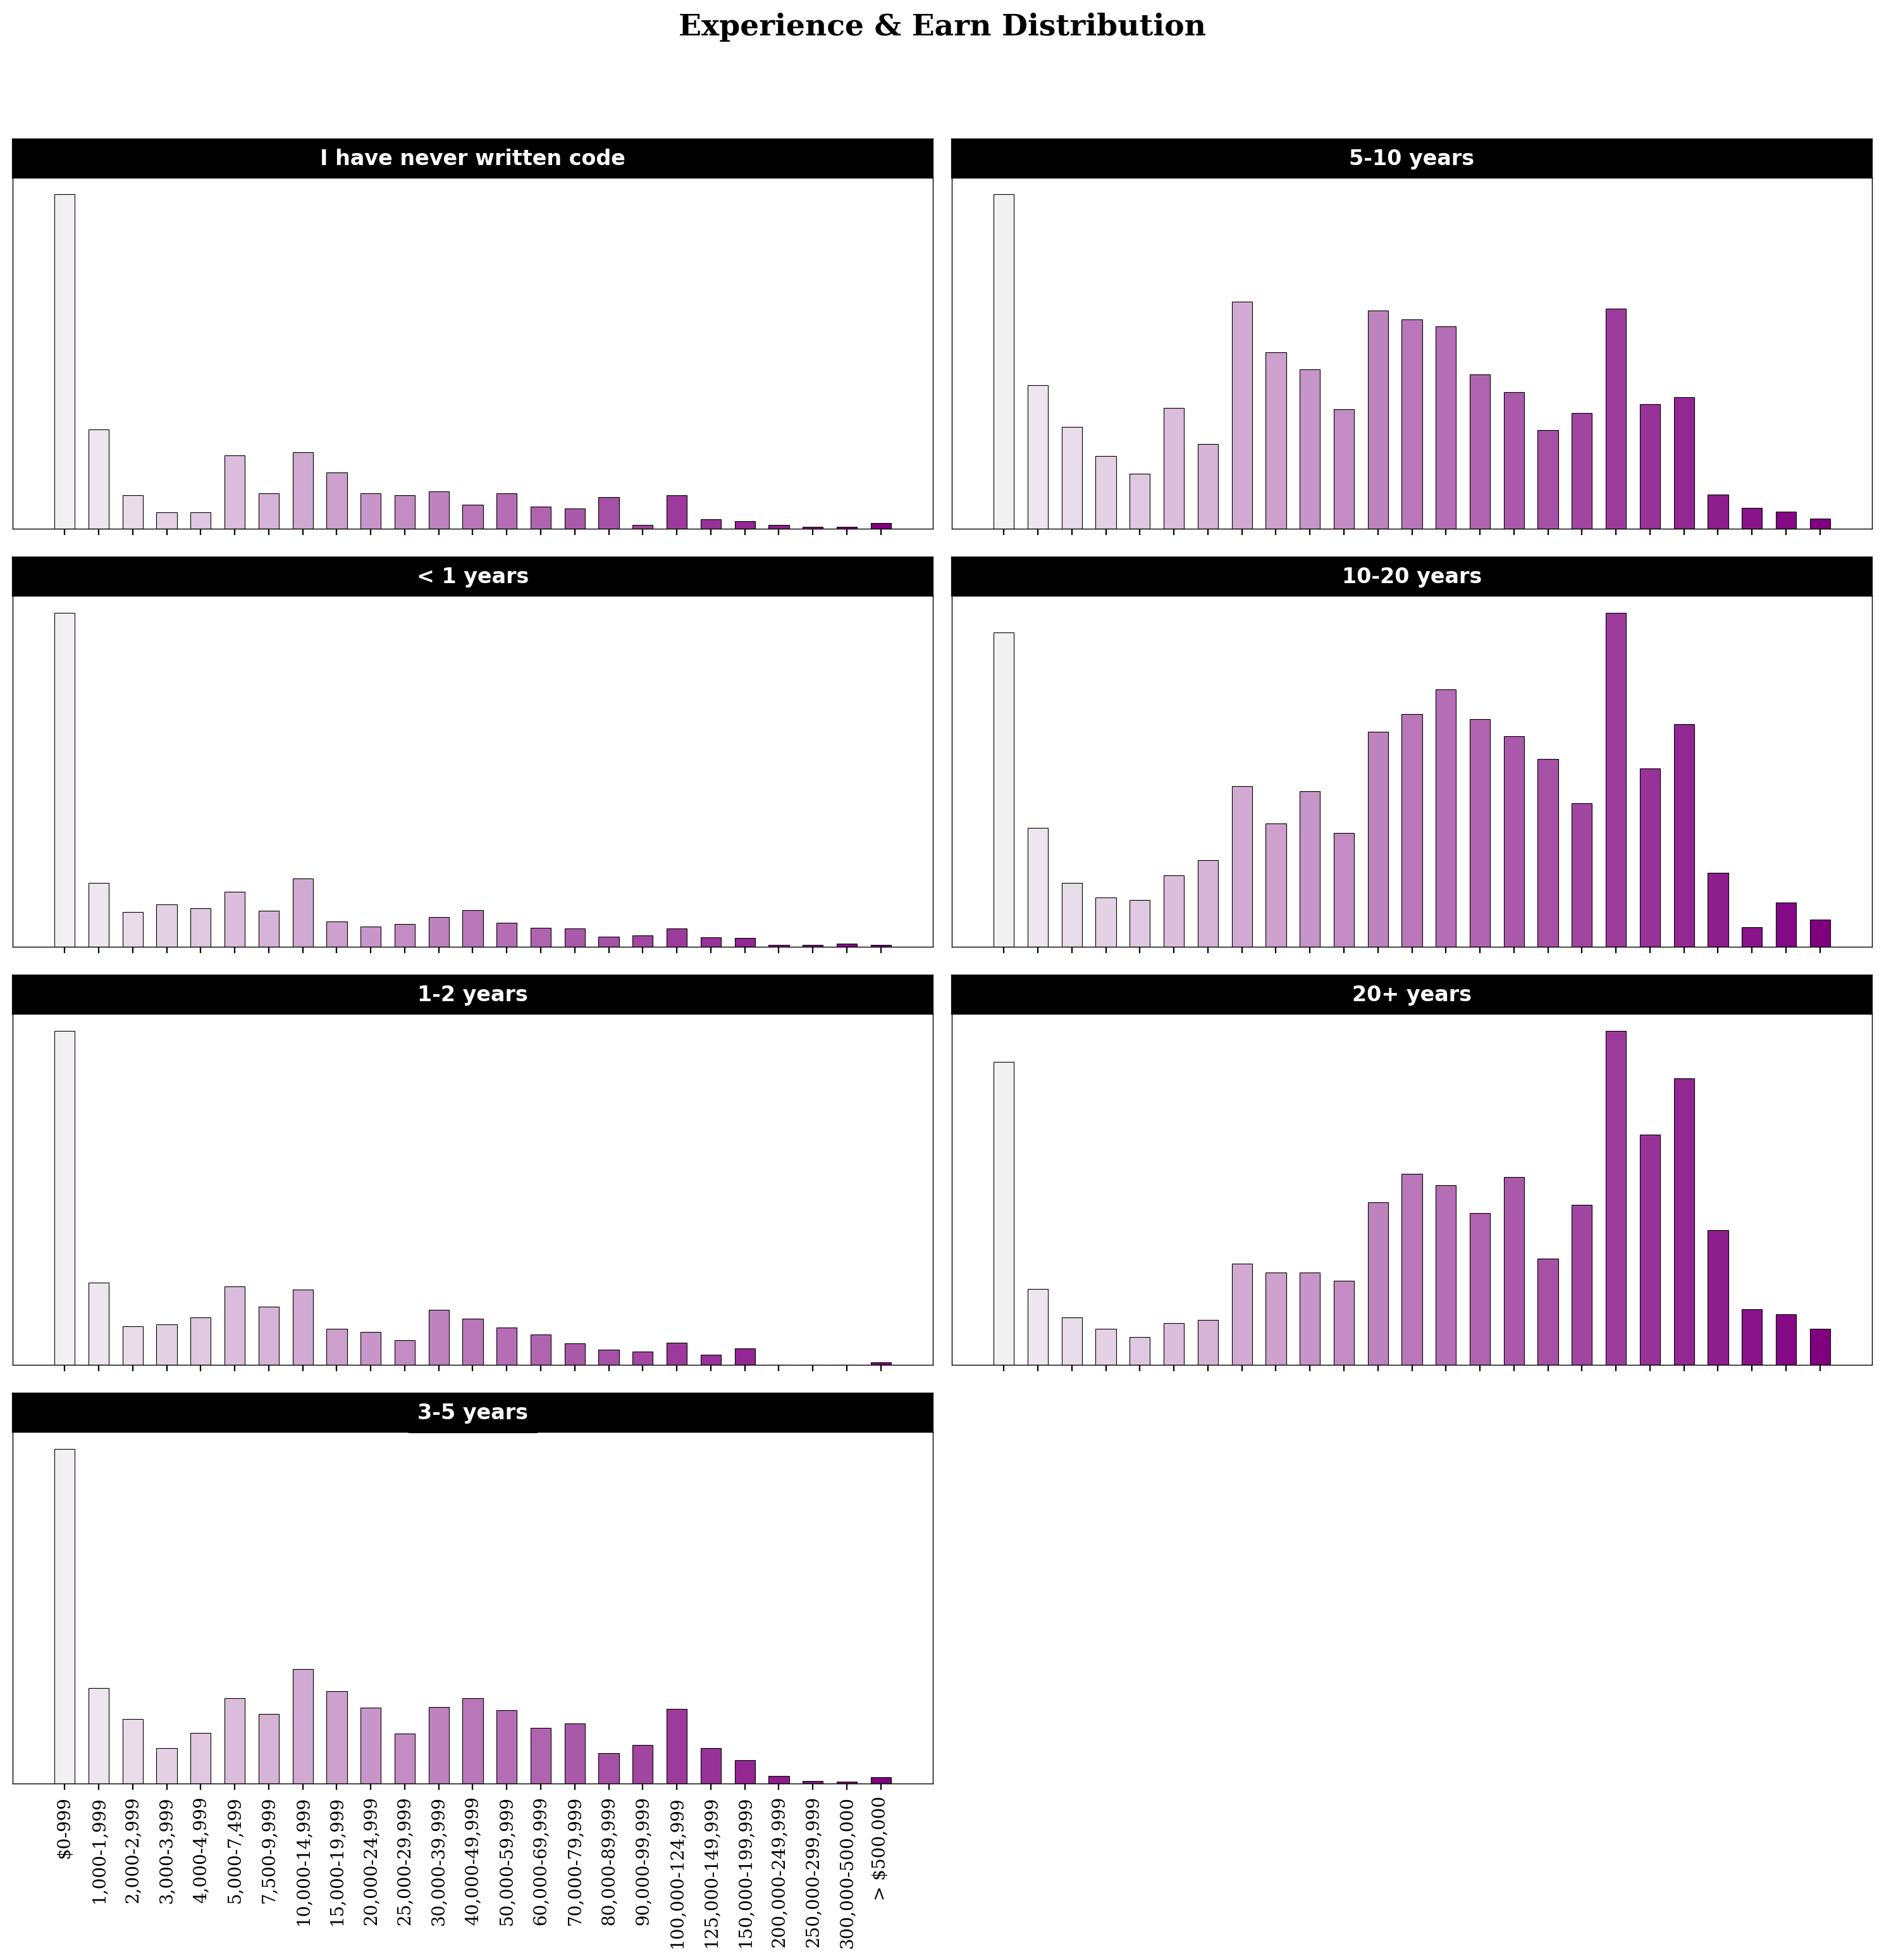

In [23]:
data_q6q24 = pd.pivot_table(data, values='count', index=['Q6'], columns=['Q24'], aggfunc=np.sum).fillna(0).astype(int).loc[q6_order,q24_order]
data_q6q24 = (data_q6q24.T /data_q6q24.sum(axis=1))#.rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

fig, ax = plt.subplots(4, 2,figsize=(15, 15), sharex=True)

for idx, q6_idx in enumerate(data_q6q24.columns):


    ax[idx%4][idx//4].bar(data_q6q24[q6_idx].index, data_q6q24[q6_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%4][idx//4].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%4][idx//4].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%4][idx//4])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q6_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][-1].set_visible(False)

fig.suptitle('Experience & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()
